the idea is cnn learn its own filter so we test if we apply a filter on images and create cnn with one layer that take image and filtered images does it learn the same filter we applied

In [77]:
import torch
import torch.nn.functional as F
import numpy as np
from PIL import Image

# Load and process the image
image = Image.open('c.jpg').convert('L')
image_arr = np.asarray(image)
image_arr = np.pad(image_arr, 1)  # Padding for border handling

# Convert image to tensor and add batch and channel dimensions (for conv2d)
x = torch.tensor(image_arr, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, H, W]

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = x.to(device)

# Define the filter to learn (random initialization)
w_filter = torch.randn(1, 1, 3, 3, requires_grad=True, dtype=torch.float32, device=device)  # Shape: [out_channels, in_channels, H, W]

# Define the ground truth filter (e.g., a sharpening filter)
ground_truth_filter = torch.tensor([[[[1, 0, -1],
                                      [1, 0, -1],
                                      [1, 0, -1]]]], dtype=torch.float32, device=device)

# Apply the ground truth filter to create the target output y
y = F.conv2d(x, ground_truth_filter, padding=0)  # Shape: [1, 1, H-2, W-2]

# Learning rate
lr = 0.000001  # Increased learning rate for faster convergence

# Training loop
for i in range(8000):
    # Forward pass (2D convolution)
    A = F.conv2d(x, w_filter, padding=0)
    
    # Loss calculation (mean squared error)
    loss = torch.mean((A - y) ** 2)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    with torch.no_grad():
        w_filter -= lr * w_filter.grad
    
    # Zero gradients for the next iteration
    w_filter.grad.zero_()

    # Print loss and filter weights
    print(f"Iteration {i+1}, Loss: {loss.item()}, Filter Weights:\n{w_filter}")


Iteration 1, Loss: 163453.6875, Filter Weights:
tensor([[[[-0.1013, -1.2611, -1.2902],
          [ 1.6561,  0.2531, -0.0534],
          [ 1.3719,  0.9913, -0.1755]]]], requires_grad=True)
Iteration 2, Loss: 53427.7578125, Filter Weights:
tensor([[[[-0.1681, -1.3286, -1.3581],
          [ 1.5870,  0.1833, -0.1236],
          [ 1.3014,  0.9201, -0.2469]]]], requires_grad=True)
Iteration 3, Loss: 19766.88671875, Filter Weights:
tensor([[[[-0.2040, -1.3650, -1.3950],
          [ 1.5489,  0.1446, -0.1627],
          [ 1.2618,  0.8799, -0.2874]]]], requires_grad=True)
Iteration 4, Loss: 9458.564453125, Filter Weights:
tensor([[[[-0.2228, -1.3842, -1.4149],
          [ 1.5281,  0.1232, -0.1846],
          [ 1.2394,  0.8569, -0.3108]]]], requires_grad=True)
Iteration 5, Loss: 6291.4501953125, Filter Weights:
tensor([[[[-0.2322, -1.3940, -1.4253],
          [ 1.5168,  0.1114, -0.1971],
          [ 1.2264,  0.8434, -0.3247]]]], requires_grad=True)
Iteration 6, Loss: 5308.1513671875, Filter Weigh

Iteration 63, Loss: 3812.7626953125, Filter Weights:
tensor([[[[-0.1200, -1.3010, -1.3690],
          [ 1.5240,  0.0932, -0.2483],
          [ 1.1421,  0.7329, -0.4599]]]], requires_grad=True)
Iteration 64, Loss: 3796.2958984375, Filter Weights:
tensor([[[[-0.1179, -1.2993, -1.3678],
          [ 1.5244,  0.0932, -0.2489],
          [ 1.1410,  0.7314, -0.4618]]]], requires_grad=True)
Iteration 65, Loss: 3779.90283203125, Filter Weights:
tensor([[[[-0.1159, -1.2976, -1.3667],
          [ 1.5247,  0.0931, -0.2495],
          [ 1.1399,  0.7299, -0.4638]]]], requires_grad=True)
Iteration 66, Loss: 3763.58251953125, Filter Weights:
tensor([[[[-0.1138, -1.2958, -1.3656],
          [ 1.5251,  0.0930, -0.2501],
          [ 1.1388,  0.7283, -0.4657]]]], requires_grad=True)
Iteration 67, Loss: 3747.335693359375, Filter Weights:
tensor([[[[-0.1118, -1.2941, -1.3644],
          [ 1.5254,  0.0930, -0.2507],
          [ 1.1377,  0.7268, -0.4676]]]], requires_grad=True)
Iteration 68, Loss: 3731.160888

Iteration 123, Loss: 2944.314453125, Filter Weights:
tensor([[[[-0.0045, -1.2030, -1.3051],
          [ 1.5432,  0.0894, -0.2828],
          [ 1.0795,  0.6467, -0.5690]]]], requires_grad=True)
Iteration 124, Loss: 2931.723876953125, Filter Weights:
tensor([[[[-0.0027, -1.2015, -1.3041],
          [ 1.5435,  0.0893, -0.2834],
          [ 1.0786,  0.6454, -0.5707]]]], requires_grad=True)
Iteration 125, Loss: 2919.188720703125, Filter Weights:
tensor([[[[-9.3378e-04, -1.1999e+00, -1.3031e+00],
          [ 1.5437e+00,  8.9266e-02, -2.8392e-01],
          [ 1.0776e+00,  6.4404e-01, -5.7240e-01]]]], requires_grad=True)
Iteration 126, Loss: 2906.710205078125, Filter Weights:
tensor([[[[ 8.5955e-04, -1.1984e+00, -1.3021e+00],
          [ 1.5440e+00,  8.9201e-02, -2.8447e-01],
          [ 1.0766e+00,  6.4271e-01, -5.7409e-01]]]], requires_grad=True)
Iteration 127, Loss: 2894.287109375, Filter Weights:
tensor([[[[ 0.0026, -1.1969, -1.3011],
          [ 1.5443,  0.0891, -0.2850],
          [ 1.07

Iteration 181, Loss: 2299.544189453125, Filter Weights:
tensor([[[[ 0.0938, -1.1194, -1.2512],
          [ 1.5587,  0.0856, -0.3132],
          [ 1.0271,  0.5743, -0.6612]]]], requires_grad=True)
Iteration 182, Loss: 2289.82666015625, Filter Weights:
tensor([[[[ 0.0954, -1.1181, -1.2504],
          [ 1.5590,  0.0855, -0.3137],
          [ 1.0262,  0.5732, -0.6627]]]], requires_grad=True)
Iteration 183, Loss: 2280.152099609375, Filter Weights:
tensor([[[[ 0.0970, -1.1167, -1.2495],
          [ 1.5592,  0.0854, -0.3142],
          [ 1.0254,  0.5720, -0.6641]]]], requires_grad=True)
Iteration 184, Loss: 2270.5205078125, Filter Weights:
tensor([[[[ 0.0986, -1.1154, -1.2487],
          [ 1.5595,  0.0854, -0.3147],
          [ 1.0246,  0.5709, -0.6656]]]], requires_grad=True)
Iteration 185, Loss: 2260.93212890625, Filter Weights:
tensor([[[[ 0.1002, -1.1140, -1.2478],
          [ 1.5597,  0.0853, -0.3152],
          [ 1.0237,  0.5697, -0.6671]]]], requires_grad=True)
Iteration 186, Loss: 225

Iteration 243, Loss: 1771.98681640625, Filter Weights:
tensor([[[[ 0.1864, -1.0407, -1.2012],
          [ 1.5726,  0.0813, -0.3429],
          [ 0.9787,  0.5074, -0.7470]]]], requires_grad=True)
Iteration 244, Loss: 1764.615234375, Filter Weights:
tensor([[[[ 0.1878, -1.0395, -1.2004],
          [ 1.5728,  0.0813, -0.3434],
          [ 0.9780,  0.5064, -0.7483]]]], requires_grad=True)
Iteration 245, Loss: 1757.27685546875, Filter Weights:
tensor([[[[ 0.1891, -1.0383, -1.1997],
          [ 1.5730,  0.0812, -0.3438],
          [ 0.9772,  0.5054, -0.7496]]]], requires_grad=True)
Iteration 246, Loss: 1749.970947265625, Filter Weights:
tensor([[[[ 0.1905, -1.0371, -1.1989],
          [ 1.5732,  0.0811, -0.3443],
          [ 0.9765,  0.5044, -0.7509]]]], requires_grad=True)
Iteration 247, Loss: 1742.6973876953125, Filter Weights:
tensor([[[[ 0.1919, -1.0359, -1.1982],
          [ 1.5734,  0.0811, -0.3447],
          [ 0.9758,  0.5035, -0.7521]]]], requires_grad=True)
Iteration 248, Loss: 173

Iteration 302, Loss: 1388.622314453125, Filter Weights:
tensor([[[[ 0.2638, -0.9746, -1.1598],
          [ 1.5834,  0.0772, -0.3687],
          [ 0.9390,  0.4525, -0.8180]]]], requires_grad=True)
Iteration 303, Loss: 1382.9517822265625, Filter Weights:
tensor([[[[ 0.2650, -0.9736, -1.1592],
          [ 1.5835,  0.0772, -0.3691],
          [ 0.9384,  0.4516, -0.8192]]]], requires_grad=True)
Iteration 304, Loss: 1377.3065185546875, Filter Weights:
tensor([[[[ 0.2663, -0.9725, -1.1585],
          [ 1.5837,  0.0771, -0.3695],
          [ 0.9378,  0.4508, -0.8203]]]], requires_grad=True)
Iteration 305, Loss: 1371.6864013671875, Filter Weights:
tensor([[[[ 0.2675, -0.9715, -1.1579],
          [ 1.5839,  0.0770, -0.3700],
          [ 0.9371,  0.4499, -0.8214]]]], requires_grad=True)
Iteration 306, Loss: 1366.09130859375, Filter Weights:
tensor([[[[ 0.2687, -0.9704, -1.1572],
          [ 1.5840,  0.0770, -0.3704],
          [ 0.9365,  0.4490, -0.8225]]]], requires_grad=True)
Iteration 307, Los

Iteration 361, Loss: 1093.618408203125, Filter Weights:
tensor([[[[ 0.3322, -0.9162, -1.1237],
          [ 1.5922,  0.0731, -0.3924],
          [ 0.9047,  0.4050, -0.8800]]]], requires_grad=True)
Iteration 362, Loss: 1089.253173828125, Filter Weights:
tensor([[[[ 0.3333, -0.9153, -1.1232],
          [ 1.5923,  0.0730, -0.3928],
          [ 0.9042,  0.4042, -0.8810]]]], requires_grad=True)
Iteration 363, Loss: 1084.9073486328125, Filter Weights:
tensor([[[[ 0.3344, -0.9143, -1.1226],
          [ 1.5924,  0.0729, -0.3932],
          [ 0.9036,  0.4035, -0.8819]]]], requires_grad=True)
Iteration 364, Loss: 1080.5806884765625, Filter Weights:
tensor([[[[ 0.3355, -0.9134, -1.1220],
          [ 1.5926,  0.0729, -0.3936],
          [ 0.9031,  0.4027, -0.8829]]]], requires_grad=True)
Iteration 365, Loss: 1076.27294921875, Filter Weights:
tensor([[[[ 0.3366, -0.9125, -1.1215],
          [ 1.5927,  0.0728, -0.3939],
          [ 0.9026,  0.4020, -0.8839]]]], requires_grad=True)
Iteration 366, Loss

Iteration 426, Loss: 846.4544067382812, Filter Weights:
tensor([[[[ 0.3984, -0.8595, -1.0893],
          [ 1.5998,  0.0684, -0.4163],
          [ 0.8724,  0.3601, -0.9391]]]], requires_grad=True)
Iteration 427, Loss: 843.1785888671875, Filter Weights:
tensor([[[[ 0.3994, -0.8587, -1.0888],
          [ 1.5999,  0.0684, -0.4167],
          [ 0.8719,  0.3594, -0.9399]]]], requires_grad=True)
Iteration 428, Loss: 839.9171142578125, Filter Weights:
tensor([[[[ 0.4003, -0.8579, -1.0884],
          [ 1.6000,  0.0683, -0.4170],
          [ 0.8715,  0.3588, -0.9407]]]], requires_grad=True)
Iteration 429, Loss: 836.6698608398438, Filter Weights:
tensor([[[[ 0.4013, -0.8570, -1.0879],
          [ 1.6001,  0.0682, -0.4174],
          [ 0.8710,  0.3582, -0.9416]]]], requires_grad=True)
Iteration 430, Loss: 833.43701171875, Filter Weights:
tensor([[[[ 0.4022, -0.8562, -1.0874],
          [ 1.6002,  0.0682, -0.4177],
          [ 0.8706,  0.3576, -0.9424]]]], requires_grad=True)
Iteration 431, Loss: 8

Iteration 491, Loss: 660.846923828125, Filter Weights:
tensor([[[[ 0.4563, -0.8098, -1.0598],
          [ 1.6056,  0.0638, -0.4382],
          [ 0.8450,  0.3220, -0.9898]]]], requires_grad=True)
Iteration 492, Loss: 658.3849487304688, Filter Weights:
tensor([[[[ 0.4571, -0.8090, -1.0593],
          [ 1.6057,  0.0637, -0.4386],
          [ 0.8446,  0.3215, -0.9905]]]], requires_grad=True)
Iteration 493, Loss: 655.9336547851562, Filter Weights:
tensor([[[[ 0.4579, -0.8083, -1.0589],
          [ 1.6057,  0.0636, -0.4389],
          [ 0.8442,  0.3209, -0.9912]]]], requires_grad=True)
Iteration 494, Loss: 653.4931030273438, Filter Weights:
tensor([[[[ 0.4588, -0.8076, -1.0585],
          [ 1.6058,  0.0635, -0.4392],
          [ 0.8438,  0.3204, -0.9919]]]], requires_grad=True)
Iteration 495, Loss: 651.063232421875, Filter Weights:
tensor([[[[ 0.4596, -0.8069, -1.0581],
          [ 1.6059,  0.0635, -0.4395],
          [ 0.8434,  0.3198, -0.9926]]]], requires_grad=True)
Iteration 496, Loss: 6

Iteration 556, Loss: 521.2376098632812, Filter Weights:
tensor([[[[ 0.5069, -0.7661, -1.0343],
          [ 1.6098,  0.0591, -0.4584],
          [ 0.8217,  0.2897, -1.0332]]]], requires_grad=True)
Iteration 557, Loss: 519.3839111328125, Filter Weights:
tensor([[[[ 0.5076, -0.7654, -1.0340],
          [ 1.6098,  0.0590, -0.4587],
          [ 0.8214,  0.2893, -1.0339]]]], requires_grad=True)
Iteration 558, Loss: 517.5381469726562, Filter Weights:
tensor([[[[ 0.5083, -0.7648, -1.0336],
          [ 1.6099,  0.0589, -0.4590],
          [ 0.8211,  0.2888, -1.0345]]]], requires_grad=True)
Iteration 559, Loss: 515.7005615234375, Filter Weights:
tensor([[[[ 0.5090, -0.7642, -1.0332],
          [ 1.6099,  0.0589, -0.4593],
          [ 0.8208,  0.2884, -1.0351]]]], requires_grad=True)
Iteration 560, Loss: 513.8707885742188, Filter Weights:
tensor([[[[ 0.5098, -0.7636, -1.0329],
          [ 1.6100,  0.0588, -0.4596],
          [ 0.8204,  0.2879, -1.0357]]]], requires_grad=True)
Iteration 561, Loss:

Iteration 619, Loss: 418.8286437988281, Filter Weights:
tensor([[[[ 0.5499, -0.7287, -1.0131],
          [ 1.6125,  0.0545, -0.4764],
          [ 0.8027,  0.2633, -1.0694]]]], requires_grad=True)
Iteration 620, Loss: 417.4176025390625, Filter Weights:
tensor([[[[ 0.5505, -0.7282, -1.0128],
          [ 1.6125,  0.0544, -0.4766],
          [ 0.8024,  0.2629, -1.0699]]]], requires_grad=True)
Iteration 621, Loss: 416.0125427246094, Filter Weights:
tensor([[[[ 0.5512, -0.7276, -1.0125],
          [ 1.6126,  0.0544, -0.4769],
          [ 0.8021,  0.2625, -1.0705]]]], requires_grad=True)
Iteration 622, Loss: 414.61358642578125, Filter Weights:
tensor([[[[ 0.5518, -0.7271, -1.0122],
          [ 1.6126,  0.0543, -0.4772],
          [ 0.8019,  0.2621, -1.0710]]]], requires_grad=True)
Iteration 623, Loss: 413.22064208984375, Filter Weights:
tensor([[[[ 0.5525, -0.7265, -1.0118],
          [ 1.6126,  0.0542, -0.4775],
          [ 0.8016,  0.2618, -1.0715]]]], requires_grad=True)
Iteration 624, Los

Iteration 676, Loss: 347.33807373046875, Filter Weights:
tensor([[[[ 0.5844, -0.6986, -0.9964],
          [ 1.6140,  0.0504, -0.4915],
          [ 0.7880,  0.2429, -1.0977]]]], requires_grad=True)
Iteration 677, Loss: 346.233154296875, Filter Weights:
tensor([[[[ 0.5850, -0.6981, -0.9961],
          [ 1.6140,  0.0503, -0.4918],
          [ 0.7877,  0.2426, -1.0982]]]], requires_grad=True)
Iteration 678, Loss: 345.1329345703125, Filter Weights:
tensor([[[[ 0.5855, -0.6976, -0.9958],
          [ 1.6140,  0.0503, -0.4920],
          [ 0.7875,  0.2422, -1.0987]]]], requires_grad=True)
Iteration 679, Loss: 344.037353515625, Filter Weights:
tensor([[[[ 0.5861, -0.6971, -0.9956],
          [ 1.6140,  0.0502, -0.4923],
          [ 0.7873,  0.2419, -1.0991]]]], requires_grad=True)
Iteration 680, Loss: 342.9465026855469, Filter Weights:
tensor([[[[ 0.5867, -0.6966, -0.9953],
          [ 1.6140,  0.0501, -0.4925],
          [ 0.7870,  0.2416, -1.0996]]]], requires_grad=True)
Iteration 681, Loss: 

Iteration 733, Loss: 291.2893371582031, Filter Weights:
tensor([[[[ 0.6151, -0.6716, -0.9817],
          [ 1.6146,  0.0463, -0.5057],
          [ 0.7753,  0.2255, -1.1224]]]], requires_grad=True)
Iteration 734, Loss: 290.4217834472656, Filter Weights:
tensor([[[[ 0.6157, -0.6712, -0.9815],
          [ 1.6146,  0.0462, -0.5059],
          [ 0.7751,  0.2252, -1.1228]]]], requires_grad=True)
Iteration 735, Loss: 289.5578918457031, Filter Weights:
tensor([[[[ 0.6162, -0.6707, -0.9813],
          [ 1.6146,  0.0462, -0.5062],
          [ 0.7749,  0.2249, -1.1232]]]], requires_grad=True)
Iteration 736, Loss: 288.69757080078125, Filter Weights:
tensor([[[[ 0.6167, -0.6703, -0.9810],
          [ 1.6146,  0.0461, -0.5064],
          [ 0.7747,  0.2246, -1.1236]]]], requires_grad=True)
Iteration 737, Loss: 287.8409423828125, Filter Weights:
tensor([[[[ 0.6172, -0.6698, -0.9808],
          [ 1.6146,  0.0460, -0.5067],
          [ 0.7745,  0.2243, -1.1240]]]], requires_grad=True)
Iteration 738, Loss

Iteration 796, Loss: 243.15887451171875, Filter Weights:
tensor([[[[ 0.6454, -0.6449, -0.9676],
          [ 1.6145,  0.0418, -0.5204],
          [ 0.7635,  0.2091, -1.1459]]]], requires_grad=True)
Iteration 797, Loss: 242.49232482910156, Filter Weights:
tensor([[[[ 0.6458, -0.6445, -0.9674],
          [ 1.6145,  0.0418, -0.5206],
          [ 0.7633,  0.2089, -1.1462]]]], requires_grad=True)
Iteration 798, Loss: 241.82850646972656, Filter Weights:
tensor([[[[ 0.6463, -0.6441, -0.9672],
          [ 1.6145,  0.0417, -0.5208],
          [ 0.7632,  0.2087, -1.1465]]]], requires_grad=True)
Iteration 799, Loss: 241.16737365722656, Filter Weights:
tensor([[[[ 0.6467, -0.6437, -0.9670],
          [ 1.6145,  0.0416, -0.5210],
          [ 0.7630,  0.2084, -1.1469]]]], requires_grad=True)
Iteration 800, Loss: 240.5090789794922, Filter Weights:
tensor([[[[ 0.6471, -0.6433, -0.9668],
          [ 1.6145,  0.0415, -0.5213],
          [ 0.7628,  0.2082, -1.1472]]]], requires_grad=True)
Iteration 801, L

Iteration 854, Loss: 208.7019500732422, Filter Weights:
tensor([[[[ 0.6701, -0.6228, -0.9564],
          [ 1.6137,  0.0377, -0.5330],
          [ 0.7543,  0.1965, -1.1644]]]], requires_grad=True)
Iteration 855, Loss: 208.17672729492188, Filter Weights:
tensor([[[[ 0.6705, -0.6225, -0.9562],
          [ 1.6137,  0.0376, -0.5332],
          [ 0.7541,  0.1963, -1.1647]]]], requires_grad=True)
Iteration 856, Loss: 207.65365600585938, Filter Weights:
tensor([[[[ 0.6709, -0.6221, -0.9560],
          [ 1.6137,  0.0376, -0.5334],
          [ 0.7540,  0.1961, -1.1650]]]], requires_grad=True)
Iteration 857, Loss: 207.13270568847656, Filter Weights:
tensor([[[[ 0.6713, -0.6218, -0.9558],
          [ 1.6137,  0.0375, -0.5336],
          [ 0.7539,  0.1959, -1.1653]]]], requires_grad=True)
Iteration 858, Loss: 206.61387634277344, Filter Weights:
tensor([[[[ 0.6717, -0.6214, -0.9556],
          [ 1.6136,  0.0374, -0.5338],
          [ 0.7537,  0.1957, -1.1656]]]], requires_grad=True)
Iteration 859, L

Iteration 916, Loss: 179.83737182617188, Filter Weights:
tensor([[[[ 0.6936, -0.6017, -0.9459],
          [ 1.6123,  0.0334, -0.5457],
          [ 0.7460,  0.1852, -1.1815]]]], requires_grad=True)
Iteration 917, Loss: 179.4280548095703, Filter Weights:
tensor([[[[ 0.6939, -0.6013, -0.9457],
          [ 1.6122,  0.0333, -0.5459],
          [ 0.7459,  0.1851, -1.1817]]]], requires_grad=True)
Iteration 918, Loss: 179.02035522460938, Filter Weights:
tensor([[[[ 0.6943, -0.6010, -0.9456],
          [ 1.6122,  0.0332, -0.5461],
          [ 0.7457,  0.1849, -1.1820]]]], requires_grad=True)
Iteration 919, Loss: 178.61424255371094, Filter Weights:
tensor([[[[ 0.6946, -0.6007, -0.9454],
          [ 1.6122,  0.0332, -0.5463],
          [ 0.7456,  0.1847, -1.1822]]]], requires_grad=True)
Iteration 920, Loss: 178.20974731445312, Filter Weights:
tensor([[[[ 0.6950, -0.6004, -0.9452],
          [ 1.6122,  0.0331, -0.5465],
          [ 0.7455,  0.1846, -1.1825]]]], requires_grad=True)
Iteration 921, L

Iteration 975, Loss: 158.24337768554688, Filter Weights:
tensor([[[[ 0.7135, -0.5835, -0.9372],
          [ 1.6104,  0.0293, -0.5571],
          [ 0.7394,  0.1764, -1.1953]]]], requires_grad=True)
Iteration 976, Loss: 157.91847229003906, Filter Weights:
tensor([[[[ 0.7139, -0.5832, -0.9370],
          [ 1.6103,  0.0292, -0.5573],
          [ 0.7393,  0.1762, -1.1956]]]], requires_grad=True)
Iteration 977, Loss: 157.59481811523438, Filter Weights:
tensor([[[[ 0.7142, -0.5829, -0.9369],
          [ 1.6103,  0.0291, -0.5575],
          [ 0.7392,  0.1761, -1.1958]]]], requires_grad=True)
Iteration 978, Loss: 157.27243041992188, Filter Weights:
tensor([[[[ 0.7145, -0.5826, -0.9368],
          [ 1.6103,  0.0291, -0.5576],
          [ 0.7391,  0.1759, -1.1960]]]], requires_grad=True)
Iteration 979, Loss: 156.95126342773438, Filter Weights:
tensor([[[[ 0.7148, -0.5823, -0.9366],
          [ 1.6102,  0.0290, -0.5578],
          [ 0.7390,  0.1758, -1.1962]]]], requires_grad=True)
Iteration 980, 

Iteration 1027, Loss: 142.8924102783203, Filter Weights:
tensor([[[[ 0.7294, -0.5689, -0.9304],
          [ 1.6083,  0.0257, -0.5666],
          [ 0.7345,  0.1698, -1.2059]]]], requires_grad=True)
Iteration 1028, Loss: 142.62579345703125, Filter Weights:
tensor([[[[ 0.7297, -0.5686, -0.9303],
          [ 1.6083,  0.0256, -0.5668],
          [ 0.7344,  0.1697, -1.2061]]]], requires_grad=True)
Iteration 1029, Loss: 142.36016845703125, Filter Weights:
tensor([[[[ 0.7300, -0.5684, -0.9302],
          [ 1.6083,  0.0255, -0.5670],
          [ 0.7343,  0.1696, -1.2063]]]], requires_grad=True)
Iteration 1030, Loss: 142.0955352783203, Filter Weights:
tensor([[[[ 0.7303, -0.5681, -0.9301],
          [ 1.6082,  0.0255, -0.5671],
          [ 0.7342,  0.1695, -1.2065]]]], requires_grad=True)
Iteration 1031, Loss: 141.83187866210938, Filter Weights:
tensor([[[[ 0.7305, -0.5678, -0.9299],
          [ 1.6082,  0.0254, -0.5673],
          [ 0.7341,  0.1694, -1.2066]]]], requires_grad=True)
Iteration 10

Iteration 1076, Loss: 130.92308044433594, Filter Weights:
tensor([[[[ 0.7430, -0.5562, -0.9248],
          [ 1.6061,  0.0223, -0.5752],
          [ 0.7305,  0.1647, -1.2145]]]], requires_grad=True)
Iteration 1077, Loss: 130.70046997070312, Filter Weights:
tensor([[[[ 0.7433, -0.5560, -0.9246],
          [ 1.6061,  0.0223, -0.5754],
          [ 0.7304,  0.1646, -1.2147]]]], requires_grad=True)
Iteration 1078, Loss: 130.4786834716797, Filter Weights:
tensor([[[[ 0.7435, -0.5557, -0.9245],
          [ 1.6061,  0.0222, -0.5755],
          [ 0.7304,  0.1645, -1.2149]]]], requires_grad=True)
Iteration 1079, Loss: 130.2576904296875, Filter Weights:
tensor([[[[ 0.7438, -0.5555, -0.9244],
          [ 1.6060,  0.0221, -0.5757],
          [ 0.7303,  0.1644, -1.2150]]]], requires_grad=True)
Iteration 1080, Loss: 130.03750610351562, Filter Weights:
tensor([[[[ 0.7441, -0.5552, -0.9243],
          [ 1.6060,  0.0221, -0.5759],
          [ 0.7302,  0.1643, -1.2152]]]], requires_grad=True)
Iteration 10

Iteration 1135, Loss: 119.0595474243164, Filter Weights:
tensor([[[[ 0.7579, -0.5422, -0.9187],
          [ 1.6032,  0.0184, -0.5850],
          [ 0.7265,  0.1595, -1.2235]]]], requires_grad=True)
Iteration 1136, Loss: 118.87893676757812, Filter Weights:
tensor([[[[ 0.7581, -0.5420, -0.9186],
          [ 1.6031,  0.0183, -0.5852],
          [ 0.7265,  0.1595, -1.2236]]]], requires_grad=True)
Iteration 1137, Loss: 118.69893646240234, Filter Weights:
tensor([[[[ 0.7583, -0.5418, -0.9185],
          [ 1.6031,  0.0182, -0.5853],
          [ 0.7264,  0.1594, -1.2238]]]], requires_grad=True)
Iteration 1138, Loss: 118.51953887939453, Filter Weights:
tensor([[[[ 0.7586, -0.5415, -0.9184],
          [ 1.6030,  0.0182, -0.5855],
          [ 0.7263,  0.1593, -1.2239]]]], requires_grad=True)
Iteration 1139, Loss: 118.34075164794922, Filter Weights:
tensor([[[[ 0.7588, -0.5413, -0.9183],
          [ 1.6030,  0.0181, -0.5857],
          [ 0.7263,  0.1592, -1.2241]]]], requires_grad=True)
Iteration 1

Iteration 1192, Loss: 109.68403625488281, Filter Weights:
tensor([[[[ 0.7708, -0.5298, -0.9136],
          [ 1.6001,  0.0146, -0.5941],
          [ 0.7234,  0.1556, -1.2308]]]], requires_grad=True)
Iteration 1193, Loss: 109.53497314453125, Filter Weights:
tensor([[[[ 0.7710, -0.5296, -0.9135],
          [ 1.6000,  0.0145, -0.5942],
          [ 0.7233,  0.1556, -1.2310]]]], requires_grad=True)
Iteration 1194, Loss: 109.38639068603516, Filter Weights:
tensor([[[[ 0.7712, -0.5294, -0.9134],
          [ 1.5999,  0.0144, -0.5944],
          [ 0.7233,  0.1555, -1.2311]]]], requires_grad=True)
Iteration 1195, Loss: 109.23828887939453, Filter Weights:
tensor([[[[ 0.7715, -0.5292, -0.9133],
          [ 1.5999,  0.0144, -0.5945],
          [ 0.7232,  0.1555, -1.2312]]]], requires_grad=True)
Iteration 1196, Loss: 109.09069061279297, Filter Weights:
tensor([[[[ 0.7717, -0.5290, -0.9133],
          [ 1.5998,  0.0143, -0.5947],
          [ 0.7232,  0.1554, -1.2313]]]], requires_grad=True)
Iteration 

Iteration 1249, Loss: 101.908447265625, Filter Weights:
tensor([[[[ 0.7825, -0.5185, -0.9091],
          [ 1.5967,  0.0108, -0.6027],
          [ 0.7208,  0.1526, -1.2370]]]], requires_grad=True)
Iteration 1250, Loss: 101.78412628173828, Filter Weights:
tensor([[[[ 0.7827, -0.5183, -0.9090],
          [ 1.5966,  0.0108, -0.6029],
          [ 0.7208,  0.1525, -1.2371]]]], requires_grad=True)
Iteration 1251, Loss: 101.66018676757812, Filter Weights:
tensor([[[[ 0.7829, -0.5181, -0.9089],
          [ 1.5966,  0.0107, -0.6030],
          [ 0.7207,  0.1525, -1.2372]]]], requires_grad=True)
Iteration 1252, Loss: 101.53662872314453, Filter Weights:
tensor([[[[ 0.7831, -0.5179, -0.9089],
          [ 1.5965,  0.0106, -0.6032],
          [ 0.7207,  0.1524, -1.2373]]]], requires_grad=True)
Iteration 1253, Loss: 101.41345977783203, Filter Weights:
tensor([[[[ 0.7833, -0.5177, -0.9088],
          [ 1.5965,  0.0106, -0.6033],
          [ 0.7206,  0.1524, -1.2374]]]], requires_grad=True)
Iteration 12

Iteration 1310, Loss: 94.97101593017578, Filter Weights:
tensor([[[[ 0.7939, -0.5072, -0.9048],
          [ 1.5929,  0.0069, -0.6116],
          [ 0.7186,  0.1502, -1.2425]]]], requires_grad=True)
Iteration 1311, Loss: 94.8673324584961, Filter Weights:
tensor([[[[ 0.7941, -0.5071, -0.9048],
          [ 1.5928,  0.0068, -0.6117],
          [ 0.7186,  0.1501, -1.2426]]]], requires_grad=True)
Iteration 1312, Loss: 94.76396179199219, Filter Weights:
tensor([[[[ 0.7942, -0.5069, -0.9047],
          [ 1.5927,  0.0068, -0.6119],
          [ 0.7186,  0.1501, -1.2427]]]], requires_grad=True)
Iteration 1313, Loss: 94.66087341308594, Filter Weights:
tensor([[[[ 0.7944, -0.5067, -0.9047],
          [ 1.5927,  0.0067, -0.6120],
          [ 0.7185,  0.1501, -1.2428]]]], requires_grad=True)
Iteration 1314, Loss: 94.5580825805664, Filter Weights:
tensor([[[[ 0.7946, -0.5065, -0.9046],
          [ 1.5926,  0.0066, -0.6121],
          [ 0.7185,  0.1500, -1.2428]]]], requires_grad=True)
Iteration 1315, L

Iteration 1373, Loss: 88.97297668457031, Filter Weights:
tensor([[[[ 0.8045, -0.4966, -0.9010],
          [ 1.5887,  0.0029, -0.6203],
          [ 0.7169,  0.1484, -1.2471]]]], requires_grad=True)
Iteration 1374, Loss: 88.88578796386719, Filter Weights:
tensor([[[[ 0.8046, -0.4964, -0.9010],
          [ 1.5886,  0.0028, -0.6204],
          [ 0.7169,  0.1484, -1.2472]]]], requires_grad=True)
Iteration 1375, Loss: 88.79883575439453, Filter Weights:
tensor([[[[ 0.8048, -0.4963, -0.9009],
          [ 1.5886,  0.0027, -0.6206],
          [ 0.7169,  0.1484, -1.2473]]]], requires_grad=True)
Iteration 1376, Loss: 88.71209716796875, Filter Weights:
tensor([[[[ 0.8050, -0.4961, -0.9009],
          [ 1.5885,  0.0027, -0.6207],
          [ 0.7168,  0.1484, -1.2473]]]], requires_grad=True)
Iteration 1377, Loss: 88.62560272216797, Filter Weights:
tensor([[[[ 0.8051, -0.4960, -0.9008],
          [ 1.5884,  0.0026, -0.6208],
          [ 0.7168,  0.1483, -1.2474]]]], requires_grad=True)
Iteration 1378,

Iteration 1429, Loss: 84.4183349609375, Filter Weights:
tensor([[[[ 8.1301e-01, -4.8784e-01, -8.9805e-01],
          [ 1.5849e+00, -6.4525e-04, -6.2775e-01],
          [ 7.1576e-01,  1.4748e-01, -1.2504e+00]]]], requires_grad=True)
Iteration 1430, Loss: 84.3426284790039, Filter Weights:
tensor([[[[ 8.1316e-01, -4.8769e-01, -8.9800e-01],
          [ 1.5848e+00, -7.0753e-04, -6.2788e-01],
          [ 7.1574e-01,  1.4746e-01, -1.2505e+00]]]], requires_grad=True)
Iteration 1431, Loss: 84.26712036132812, Filter Weights:
tensor([[[[ 8.1331e-01, -4.8753e-01, -8.9795e-01],
          [ 1.5847e+00, -7.6980e-04, -6.2801e-01],
          [ 7.1572e-01,  1.4745e-01, -1.2506e+00]]]], requires_grad=True)
Iteration 1432, Loss: 84.1917724609375, Filter Weights:
tensor([[[[ 8.1345e-01, -4.8738e-01, -8.9790e-01],
          [ 1.5847e+00, -8.3206e-04, -6.2814e-01],
          [ 7.1571e-01,  1.4744e-01, -1.2506e+00]]]], requires_grad=True)
Iteration 1433, Loss: 84.11662292480469, Filter Weights:
tensor([[[[ 8.

Iteration 1492, Loss: 79.97844696044922, Filter Weights:
tensor([[[[ 0.8218, -0.4787, -0.8951],
          [ 1.5804, -0.0045, -0.6358],
          [ 0.7148,  0.1470, -1.2534]]]], requires_grad=True)
Iteration 1493, Loss: 79.9129409790039, Filter Weights:
tensor([[[[ 0.8219, -0.4785, -0.8951],
          [ 1.5803, -0.0046, -0.6359],
          [ 0.7148,  0.1470, -1.2535]]]], requires_grad=True)
Iteration 1494, Loss: 79.84758758544922, Filter Weights:
tensor([[[[ 0.8220, -0.4784, -0.8950],
          [ 1.5803, -0.0047, -0.6360],
          [ 0.7148,  0.1469, -1.2535]]]], requires_grad=True)
Iteration 1495, Loss: 79.78235626220703, Filter Weights:
tensor([[[[ 0.8222, -0.4782, -0.8950],
          [ 1.5802, -0.0047, -0.6362],
          [ 0.7148,  0.1469, -1.2535]]]], requires_grad=True)
Iteration 1496, Loss: 79.71727752685547, Filter Weights:
tensor([[[[ 0.8223, -0.4781, -0.8949],
          [ 1.5801, -0.0048, -0.6363],
          [ 0.7148,  0.1469, -1.2536]]]], requires_grad=True)
Iteration 1497, 

Iteration 1558, Loss: 75.9370346069336, Filter Weights:
tensor([[[[ 0.8301, -0.4698, -0.8924],
          [ 1.5756, -0.0085, -0.6439],
          [ 0.7142,  0.1470, -1.2558]]]], requires_grad=True)
Iteration 1559, Loss: 75.87982940673828, Filter Weights:
tensor([[[[ 0.8302, -0.4696, -0.8924],
          [ 1.5755, -0.0086, -0.6440],
          [ 0.7142,  0.1470, -1.2558]]]], requires_grad=True)
Iteration 1560, Loss: 75.82275390625, Filter Weights:
tensor([[[[ 0.8303, -0.4695, -0.8923],
          [ 1.5754, -0.0087, -0.6441],
          [ 0.7142,  0.1470, -1.2558]]]], requires_grad=True)
Iteration 1561, Loss: 75.76579284667969, Filter Weights:
tensor([[[[ 0.8304, -0.4694, -0.8923],
          [ 1.5754, -0.0087, -0.6442],
          [ 0.7142,  0.1470, -1.2559]]]], requires_grad=True)
Iteration 1562, Loss: 75.70893859863281, Filter Weights:
tensor([[[[ 0.8306, -0.4692, -0.8922],
          [ 1.5753, -0.0088, -0.6444],
          [ 0.7142,  0.1470, -1.2559]]]], requires_grad=True)
Iteration 1563, Los

Iteration 1606, Loss: 73.31028747558594, Filter Weights:
tensor([[[[ 0.8356, -0.4637, -0.8907],
          [ 1.5720, -0.0114, -0.6495],
          [ 0.7140,  0.1472, -1.2570]]]], requires_grad=True)
Iteration 1607, Loss: 73.25798797607422, Filter Weights:
tensor([[[[ 0.8357, -0.4635, -0.8906],
          [ 1.5720, -0.0115, -0.6497],
          [ 0.7140,  0.1473, -1.2571]]]], requires_grad=True)
Iteration 1608, Loss: 73.20577239990234, Filter Weights:
tensor([[[[ 0.8359, -0.4634, -0.8906],
          [ 1.5719, -0.0115, -0.6498],
          [ 0.7140,  0.1473, -1.2571]]]], requires_grad=True)
Iteration 1609, Loss: 73.1536636352539, Filter Weights:
tensor([[[[ 0.8360, -0.4633, -0.8906],
          [ 1.5718, -0.0116, -0.6499],
          [ 0.7140,  0.1473, -1.2571]]]], requires_grad=True)
Iteration 1610, Loss: 73.10164642333984, Filter Weights:
tensor([[[[ 0.8361, -0.4632, -0.8905],
          [ 1.5717, -0.0116, -0.6500],
          [ 0.7140,  0.1473, -1.2571]]]], requires_grad=True)
Iteration 1611, 

Iteration 1662, Loss: 70.51545715332031, Filter Weights:
tensor([[[[ 0.8417, -0.4569, -0.8888],
          [ 1.5678, -0.0147, -0.6560],
          [ 0.7139,  0.1479, -1.2581]]]], requires_grad=True)
Iteration 1663, Loss: 70.46788024902344, Filter Weights:
tensor([[[[ 0.8418, -0.4568, -0.8888],
          [ 1.5677, -0.0148, -0.6561],
          [ 0.7139,  0.1479, -1.2582]]]], requires_grad=True)
Iteration 1664, Loss: 70.4203872680664, Filter Weights:
tensor([[[[ 0.8419, -0.4567, -0.8888],
          [ 1.5677, -0.0148, -0.6562],
          [ 0.7139,  0.1479, -1.2582]]]], requires_grad=True)
Iteration 1665, Loss: 70.37295532226562, Filter Weights:
tensor([[[[ 0.8420, -0.4566, -0.8887],
          [ 1.5676, -0.0149, -0.6563],
          [ 0.7139,  0.1479, -1.2582]]]], requires_grad=True)
Iteration 1666, Loss: 70.32559204101562, Filter Weights:
tensor([[[[ 0.8421, -0.4565, -0.8887],
          [ 1.5675, -0.0149, -0.6564],
          [ 0.7139,  0.1479, -1.2582]]]], requires_grad=True)
Iteration 1667, 

Iteration 1717, Loss: 68.00485229492188, Filter Weights:
tensor([[[[ 0.8471, -0.4507, -0.8872],
          [ 1.5636, -0.0179, -0.6621],
          [ 0.7139,  0.1487, -1.2589]]]], requires_grad=True)
Iteration 1718, Loss: 67.96109008789062, Filter Weights:
tensor([[[[ 0.8472, -0.4506, -0.8872],
          [ 1.5636, -0.0180, -0.6622],
          [ 0.7140,  0.1487, -1.2589]]]], requires_grad=True)
Iteration 1719, Loss: 67.91739654541016, Filter Weights:
tensor([[[[ 0.8473, -0.4505, -0.8872],
          [ 1.5635, -0.0180, -0.6623],
          [ 0.7140,  0.1488, -1.2589]]]], requires_grad=True)
Iteration 1720, Loss: 67.87377166748047, Filter Weights:
tensor([[[[ 0.8474, -0.4504, -0.8871],
          [ 1.5634, -0.0181, -0.6624],
          [ 0.7140,  0.1488, -1.2589]]]], requires_grad=True)
Iteration 1721, Loss: 67.83018493652344, Filter Weights:
tensor([[[[ 0.8475, -0.4503, -0.8871],
          [ 1.5633, -0.0181, -0.6625],
          [ 0.7140,  0.1488, -1.2589]]]], requires_grad=True)
Iteration 1722,

Iteration 1782, Loss: 65.2833480834961, Filter Weights:
tensor([[[[ 0.8531, -0.4437, -0.8855],
          [ 1.5586, -0.0216, -0.6691],
          [ 0.7142,  0.1500, -1.2593]]]], requires_grad=True)
Iteration 1783, Loss: 65.24330139160156, Filter Weights:
tensor([[[[ 0.8532, -0.4436, -0.8855],
          [ 1.5586, -0.0217, -0.6692],
          [ 0.7142,  0.1500, -1.2593]]]], requires_grad=True)
Iteration 1784, Loss: 65.20331573486328, Filter Weights:
tensor([[[[ 0.8533, -0.4435, -0.8855],
          [ 1.5585, -0.0217, -0.6693],
          [ 0.7142,  0.1500, -1.2593]]]], requires_grad=True)
Iteration 1785, Loss: 65.16336822509766, Filter Weights:
tensor([[[[ 0.8534, -0.4434, -0.8855],
          [ 1.5584, -0.0218, -0.6694],
          [ 0.7142,  0.1501, -1.2593]]]], requires_grad=True)
Iteration 1786, Loss: 65.12348175048828, Filter Weights:
tensor([[[[ 0.8535, -0.4433, -0.8854],
          [ 1.5583, -0.0218, -0.6695],
          [ 0.7142,  0.1501, -1.2593]]]], requires_grad=True)
Iteration 1787, 

Iteration 1844, Loss: 62.89174270629883, Filter Weights:
tensor([[[[ 0.8584, -0.4374, -0.8841],
          [ 1.5538, -0.0251, -0.6755],
          [ 0.7146,  0.1515, -1.2594]]]], requires_grad=True)
Iteration 1845, Loss: 62.85459899902344, Filter Weights:
tensor([[[[ 0.8584, -0.4373, -0.8841],
          [ 1.5538, -0.0251, -0.6756],
          [ 0.7146,  0.1515, -1.2594]]]], requires_grad=True)
Iteration 1846, Loss: 62.817501068115234, Filter Weights:
tensor([[[[ 0.8585, -0.4372, -0.8841],
          [ 1.5537, -0.0252, -0.6757],
          [ 0.7146,  0.1515, -1.2594]]]], requires_grad=True)
Iteration 1847, Loss: 62.78042984008789, Filter Weights:
tensor([[[[ 0.8586, -0.4371, -0.8840],
          [ 1.5536, -0.0252, -0.6758],
          [ 0.7146,  0.1515, -1.2594]]]], requires_grad=True)
Iteration 1848, Loss: 62.7434196472168, Filter Weights:
tensor([[[[ 0.8587, -0.4370, -0.8840],
          [ 1.5535, -0.0253, -0.6759],
          [ 0.7146,  0.1516, -1.2594]]]], requires_grad=True)
Iteration 1849,

Iteration 1905, Loss: 60.70010757446289, Filter Weights:
tensor([[[[ 0.8632, -0.4315, -0.8828],
          [ 1.5491, -0.0284, -0.6816],
          [ 0.7151,  0.1531, -1.2591]]]], requires_grad=True)
Iteration 1906, Loss: 60.66536331176758, Filter Weights:
tensor([[[[ 0.8632, -0.4314, -0.8828],
          [ 1.5490, -0.0285, -0.6817],
          [ 0.7151,  0.1531, -1.2591]]]], requires_grad=True)
Iteration 1907, Loss: 60.63064956665039, Filter Weights:
tensor([[[[ 0.8633, -0.4313, -0.8828],
          [ 1.5489, -0.0285, -0.6818],
          [ 0.7151,  0.1531, -1.2591]]]], requires_grad=True)
Iteration 1908, Loss: 60.59597396850586, Filter Weights:
tensor([[[[ 0.8634, -0.4312, -0.8828],
          [ 1.5489, -0.0286, -0.6819],
          [ 0.7151,  0.1532, -1.2591]]]], requires_grad=True)
Iteration 1909, Loss: 60.56133270263672, Filter Weights:
tensor([[[[ 0.8635, -0.4311, -0.8828],
          [ 1.5488, -0.0286, -0.6820],
          [ 0.7151,  0.1532, -1.2591]]]], requires_grad=True)
Iteration 1910,

Iteration 1968, Loss: 58.57814407348633, Filter Weights:
tensor([[[[ 0.8678, -0.4257, -0.8817],
          [ 1.5442, -0.0318, -0.6878],
          [ 0.7157,  0.1549, -1.2586]]]], requires_grad=True)
Iteration 1969, Loss: 58.545501708984375, Filter Weights:
tensor([[[[ 0.8678, -0.4256, -0.8817],
          [ 1.5441, -0.0319, -0.6879],
          [ 0.7157,  0.1549, -1.2586]]]], requires_grad=True)
Iteration 1970, Loss: 58.51289367675781, Filter Weights:
tensor([[[[ 0.8679, -0.4255, -0.8816],
          [ 1.5440, -0.0319, -0.6880],
          [ 0.7157,  0.1550, -1.2586]]]], requires_grad=True)
Iteration 1971, Loss: 58.48031234741211, Filter Weights:
tensor([[[[ 0.8680, -0.4254, -0.8816],
          [ 1.5440, -0.0320, -0.6881],
          [ 0.7157,  0.1550, -1.2586]]]], requires_grad=True)
Iteration 1972, Loss: 58.44776153564453, Filter Weights:
tensor([[[[ 0.8680, -0.4254, -0.8816],
          [ 1.5439, -0.0320, -0.6882],
          [ 0.7157,  0.1550, -1.2586]]]], requires_grad=True)
Iteration 1973

Iteration 2030, Loss: 56.60993194580078, Filter Weights:
tensor([[[[ 0.8720, -0.4203, -0.8807],
          [ 1.5394, -0.0351, -0.6937],
          [ 0.7164,  0.1568, -1.2579]]]], requires_grad=True)
Iteration 2031, Loss: 56.57906723022461, Filter Weights:
tensor([[[[ 0.8721, -0.4202, -0.8806],
          [ 1.5393, -0.0351, -0.6937],
          [ 0.7164,  0.1569, -1.2579]]]], requires_grad=True)
Iteration 2032, Loss: 56.54823684692383, Filter Weights:
tensor([[[[ 0.8721, -0.4201, -0.8806],
          [ 1.5392, -0.0352, -0.6938],
          [ 0.7164,  0.1569, -1.2579]]]], requires_grad=True)
Iteration 2033, Loss: 56.517425537109375, Filter Weights:
tensor([[[[ 0.8722, -0.4200, -0.8806],
          [ 1.5391, -0.0352, -0.6939],
          [ 0.7164,  0.1569, -1.2579]]]], requires_grad=True)
Iteration 2034, Loss: 56.48664855957031, Filter Weights:
tensor([[[[ 0.8723, -0.4199, -0.8806],
          [ 1.5391, -0.0353, -0.6940],
          [ 0.7164,  0.1570, -1.2579]]]], requires_grad=True)
Iteration 2035

Iteration 2092, Loss: 54.74502944946289, Filter Weights:
tensor([[[[ 0.8759, -0.4150, -0.8797],
          [ 1.5345, -0.0383, -0.6994],
          [ 0.7171,  0.1589, -1.2570]]]], requires_grad=True)
Iteration 2093, Loss: 54.71572494506836, Filter Weights:
tensor([[[[ 0.8760, -0.4149, -0.8797],
          [ 1.5345, -0.0383, -0.6995],
          [ 0.7172,  0.1589, -1.2570]]]], requires_grad=True)
Iteration 2094, Loss: 54.68643569946289, Filter Weights:
tensor([[[[ 0.8761, -0.4149, -0.8797],
          [ 1.5344, -0.0384, -0.6995],
          [ 0.7172,  0.1589, -1.2570]]]], requires_grad=True)
Iteration 2095, Loss: 54.65718078613281, Filter Weights:
tensor([[[[ 0.8761, -0.4148, -0.8797],
          [ 1.5343, -0.0384, -0.6996],
          [ 0.7172,  0.1590, -1.2570]]]], requires_grad=True)
Iteration 2096, Loss: 54.62794494628906, Filter Weights:
tensor([[[[ 0.8762, -0.4147, -0.8797],
          [ 1.5342, -0.0385, -0.6997],
          [ 0.7172,  0.1590, -1.2570]]]], requires_grad=True)
Iteration 2097,

Iteration 2150, Loss: 53.08274841308594, Filter Weights:
tensor([[[[ 0.8794, -0.4103, -0.8790],
          [ 1.5301, -0.0412, -0.7046],
          [ 0.7179,  0.1608, -1.2561]]]], requires_grad=True)
Iteration 2151, Loss: 53.05472946166992, Filter Weights:
tensor([[[[ 0.8795, -0.4102, -0.8789],
          [ 1.5300, -0.0413, -0.7046],
          [ 0.7179,  0.1609, -1.2560]]]], requires_grad=True)
Iteration 2152, Loss: 53.026737213134766, Filter Weights:
tensor([[[[ 0.8795, -0.4101, -0.8789],
          [ 1.5299, -0.0413, -0.7047],
          [ 0.7179,  0.1609, -1.2560]]]], requires_grad=True)
Iteration 2153, Loss: 52.9987678527832, Filter Weights:
tensor([[[[ 0.8796, -0.4101, -0.8789],
          [ 1.5298, -0.0414, -0.7048],
          [ 0.7179,  0.1609, -1.2560]]]], requires_grad=True)
Iteration 2154, Loss: 52.9708251953125, Filter Weights:
tensor([[[[ 0.8797, -0.4100, -0.8789],
          [ 1.5297, -0.0414, -0.7049],
          [ 0.7180,  0.1610, -1.2560]]]], requires_grad=True)
Iteration 2155, 

Iteration 2211, Loss: 51.411285400390625, Filter Weights:
tensor([[[[ 0.8829, -0.4055, -0.8782],
          [ 1.5254, -0.0443, -0.7099],
          [ 0.7187,  0.1630, -1.2549]]]], requires_grad=True)
Iteration 2212, Loss: 51.384498596191406, Filter Weights:
tensor([[[[ 0.8829, -0.4054, -0.8782],
          [ 1.5253, -0.0443, -0.7100],
          [ 0.7187,  0.1630, -1.2549]]]], requires_grad=True)
Iteration 2213, Loss: 51.35772705078125, Filter Weights:
tensor([[[[ 0.8830, -0.4054, -0.8782],
          [ 1.5252, -0.0444, -0.7101],
          [ 0.7188,  0.1631, -1.2548]]]], requires_grad=True)
Iteration 2214, Loss: 51.33098602294922, Filter Weights:
tensor([[[[ 0.8830, -0.4053, -0.8782],
          [ 1.5251, -0.0444, -0.7101],
          [ 0.7188,  0.1631, -1.2548]]]], requires_grad=True)
Iteration 2215, Loss: 51.30424499511719, Filter Weights:
tensor([[[[ 0.8831, -0.4052, -0.8782],
          [ 1.5250, -0.0445, -0.7102],
          [ 0.7188,  0.1631, -1.2548]]]], requires_grad=True)
Iteration 221

Iteration 2266, Loss: 49.96547317504883, Filter Weights:
tensor([[[[ 0.8858, -0.4013, -0.8776],
          [ 1.5211, -0.0470, -0.7146],
          [ 0.7195,  0.1650, -1.2537]]]], requires_grad=True)
Iteration 2267, Loss: 49.93968963623047, Filter Weights:
tensor([[[[ 0.8859, -0.4013, -0.8776],
          [ 1.5211, -0.0470, -0.7147],
          [ 0.7195,  0.1650, -1.2537]]]], requires_grad=True)
Iteration 2268, Loss: 49.91392517089844, Filter Weights:
tensor([[[[ 0.8859, -0.4012, -0.8776],
          [ 1.5210, -0.0471, -0.7147],
          [ 0.7195,  0.1650, -1.2537]]]], requires_grad=True)
Iteration 2269, Loss: 49.88817596435547, Filter Weights:
tensor([[[[ 0.8860, -0.4011, -0.8776],
          [ 1.5209, -0.0471, -0.7148],
          [ 0.7196,  0.1651, -1.2537]]]], requires_grad=True)
Iteration 2270, Loss: 49.86244201660156, Filter Weights:
tensor([[[[ 0.8860, -0.4010, -0.8775],
          [ 1.5208, -0.0472, -0.7149],
          [ 0.7196,  0.1651, -1.2537]]]], requires_grad=True)
Iteration 2271,

Iteration 2321, Loss: 48.572898864746094, Filter Weights:
tensor([[[[ 0.8886, -0.3973, -0.8770],
          [ 1.5169, -0.0496, -0.7192],
          [ 0.7203,  0.1670, -1.2525]]]], requires_grad=True)
Iteration 2322, Loss: 48.54804611206055, Filter Weights:
tensor([[[[ 0.8887, -0.3972, -0.8770],
          [ 1.5169, -0.0497, -0.7192],
          [ 0.7203,  0.1670, -1.2525]]]], requires_grad=True)
Iteration 2323, Loss: 48.523216247558594, Filter Weights:
tensor([[[[ 0.8887, -0.3971, -0.8770],
          [ 1.5168, -0.0497, -0.7193],
          [ 0.7204,  0.1670, -1.2525]]]], requires_grad=True)
Iteration 2324, Loss: 48.49839401245117, Filter Weights:
tensor([[[[ 0.8888, -0.3971, -0.8770],
          [ 1.5167, -0.0498, -0.7194],
          [ 0.7204,  0.1671, -1.2525]]]], requires_grad=True)
Iteration 2325, Loss: 48.47359085083008, Filter Weights:
tensor([[[[ 0.8888, -0.3970, -0.8770],
          [ 1.5166, -0.0498, -0.7195],
          [ 0.7204,  0.1671, -1.2524]]]], requires_grad=True)
Iteration 232

Iteration 2386, Loss: 46.99055480957031, Filter Weights:
tensor([[[[ 0.8918, -0.3926, -0.8764],
          [ 1.5120, -0.0527, -0.7245],
          [ 0.7213,  0.1694, -1.2510]]]], requires_grad=True)
Iteration 2387, Loss: 46.966712951660156, Filter Weights:
tensor([[[[ 0.8918, -0.3926, -0.8764],
          [ 1.5119, -0.0528, -0.7245],
          [ 0.7213,  0.1694, -1.2510]]]], requires_grad=True)
Iteration 2388, Loss: 46.942893981933594, Filter Weights:
tensor([[[[ 0.8919, -0.3925, -0.8764],
          [ 1.5119, -0.0528, -0.7246],
          [ 0.7213,  0.1694, -1.2509]]]], requires_grad=True)
Iteration 2389, Loss: 46.91908264160156, Filter Weights:
tensor([[[[ 0.8919, -0.3924, -0.8764],
          [ 1.5118, -0.0529, -0.7247],
          [ 0.7213,  0.1695, -1.2509]]]], requires_grad=True)
Iteration 2390, Loss: 46.895286560058594, Filter Weights:
tensor([[[[ 0.8920, -0.3923, -0.8764],
          [ 1.5117, -0.0529, -0.7248],
          [ 0.7214,  0.1695, -1.2509]]]], requires_grad=True)
Iteration 23

Iteration 2444, Loss: 45.63258743286133, Filter Weights:
tensor([[[[ 0.8945, -0.3886, -0.8759],
          [ 1.5077, -0.0554, -0.7291],
          [ 0.7222,  0.1715, -1.2496]]]], requires_grad=True)
Iteration 2445, Loss: 45.609596252441406, Filter Weights:
tensor([[[[ 0.8945, -0.3885, -0.8759],
          [ 1.5076, -0.0555, -0.7291],
          [ 0.7222,  0.1716, -1.2495]]]], requires_grad=True)
Iteration 2446, Loss: 45.58662033081055, Filter Weights:
tensor([[[[ 0.8946, -0.3885, -0.8759],
          [ 1.5075, -0.0555, -0.7292],
          [ 0.7222,  0.1716, -1.2495]]]], requires_grad=True)
Iteration 2447, Loss: 45.56365203857422, Filter Weights:
tensor([[[[ 0.8946, -0.3884, -0.8759],
          [ 1.5074, -0.0555, -0.7293],
          [ 0.7222,  0.1716, -1.2495]]]], requires_grad=True)
Iteration 2448, Loss: 45.540706634521484, Filter Weights:
tensor([[[[ 0.8947, -0.3883, -0.8758],
          [ 1.5074, -0.0556, -0.7294],
          [ 0.7222,  0.1717, -1.2495]]]], requires_grad=True)
Iteration 244

Iteration 2505, Loss: 44.25565719604492, Filter Weights:
tensor([[[[ 0.8972, -0.3845, -0.8754],
          [ 1.5031, -0.0582, -0.7338],
          [ 0.7231,  0.1738, -1.2480]]]], requires_grad=True)
Iteration 2506, Loss: 44.23350524902344, Filter Weights:
tensor([[[[ 0.8972, -0.3844, -0.8754],
          [ 1.5030, -0.0582, -0.7339],
          [ 0.7231,  0.1739, -1.2480]]]], requires_grad=True)
Iteration 2507, Loss: 44.211368560791016, Filter Weights:
tensor([[[[ 0.8973, -0.3843, -0.8754],
          [ 1.5030, -0.0583, -0.7340],
          [ 0.7231,  0.1739, -1.2480]]]], requires_grad=True)
Iteration 2508, Loss: 44.18924331665039, Filter Weights:
tensor([[[[ 0.8973, -0.3843, -0.8754],
          [ 1.5029, -0.0583, -0.7340],
          [ 0.7232,  0.1739, -1.2479]]]], requires_grad=True)
Iteration 2509, Loss: 44.16712951660156, Filter Weights:
tensor([[[[ 0.8973, -0.3842, -0.8753],
          [ 1.5028, -0.0584, -0.7341],
          [ 0.7232,  0.1740, -1.2479]]]], requires_grad=True)
Iteration 2510

Iteration 2571, Loss: 42.821537017822266, Filter Weights:
tensor([[[[ 0.9000, -0.3801, -0.8749],
          [ 1.4982, -0.0611, -0.7388],
          [ 0.7241,  0.1763, -1.2463]]]], requires_grad=True)
Iteration 2572, Loss: 42.80023193359375, Filter Weights:
tensor([[[[ 0.9000, -0.3800, -0.8749],
          [ 1.4982, -0.0612, -0.7389],
          [ 0.7242,  0.1763, -1.2462]]]], requires_grad=True)
Iteration 2573, Loss: 42.77893829345703, Filter Weights:
tensor([[[[ 0.9000, -0.3800, -0.8749],
          [ 1.4981, -0.0612, -0.7390],
          [ 0.7242,  0.1764, -1.2462]]]], requires_grad=True)
Iteration 2574, Loss: 42.75765609741211, Filter Weights:
tensor([[[[ 0.9001, -0.3799, -0.8749],
          [ 1.4980, -0.0613, -0.7390],
          [ 0.7242,  0.1764, -1.2462]]]], requires_grad=True)
Iteration 2575, Loss: 42.73638916015625, Filter Weights:
tensor([[[[ 0.9001, -0.3798, -0.8748],
          [ 1.4979, -0.0613, -0.7391],
          [ 0.7242,  0.1764, -1.2462]]]], requires_grad=True)
Iteration 2576

Iteration 2633, Loss: 41.524051666259766, Filter Weights:
tensor([[[[ 0.9024, -0.3761, -0.8744],
          [ 1.4937, -0.0638, -0.7434],
          [ 0.7251,  0.1786, -1.2446]]]], requires_grad=True)
Iteration 2634, Loss: 41.50350570678711, Filter Weights:
tensor([[[[ 0.9025, -0.3760, -0.8744],
          [ 1.4936, -0.0639, -0.7435],
          [ 0.7251,  0.1787, -1.2446]]]], requires_grad=True)
Iteration 2635, Loss: 41.482967376708984, Filter Weights:
tensor([[[[ 0.9025, -0.3760, -0.8744],
          [ 1.4936, -0.0639, -0.7436],
          [ 0.7251,  0.1787, -1.2445]]]], requires_grad=True)
Iteration 2636, Loss: 41.46244812011719, Filter Weights:
tensor([[[[ 0.9026, -0.3759, -0.8744],
          [ 1.4935, -0.0640, -0.7436],
          [ 0.7251,  0.1787, -1.2445]]]], requires_grad=True)
Iteration 2637, Loss: 41.441932678222656, Filter Weights:
tensor([[[[ 0.9026, -0.3759, -0.8744],
          [ 1.4934, -0.0640, -0.7437],
          [ 0.7252,  0.1788, -1.2445]]]], requires_grad=True)
Iteration 26

Iteration 2690, Loss: 40.37156295776367, Filter Weights:
tensor([[[[ 0.9047, -0.3725, -0.8741],
          [ 1.4896, -0.0663, -0.7475],
          [ 0.7260,  0.1808, -1.2430]]]], requires_grad=True)
Iteration 2691, Loss: 40.351680755615234, Filter Weights:
tensor([[[[ 0.9047, -0.3725, -0.8741],
          [ 1.4895, -0.0663, -0.7476],
          [ 0.7260,  0.1808, -1.2430]]]], requires_grad=True)
Iteration 2692, Loss: 40.331809997558594, Filter Weights:
tensor([[[[ 0.9047, -0.3724, -0.8740],
          [ 1.4894, -0.0664, -0.7477],
          [ 0.7260,  0.1808, -1.2430]]]], requires_grad=True)
Iteration 2693, Loss: 40.31194305419922, Filter Weights:
tensor([[[[ 0.9048, -0.3723, -0.8740],
          [ 1.4894, -0.0664, -0.7478],
          [ 0.7260,  0.1809, -1.2430]]]], requires_grad=True)
Iteration 2694, Loss: 40.29209899902344, Filter Weights:
tensor([[[[ 0.9048, -0.3723, -0.8740],
          [ 1.4893, -0.0664, -0.7478],
          [ 0.7260,  0.1809, -1.2429]]]], requires_grad=True)
Iteration 269

Iteration 2748, Loss: 39.23671340942383, Filter Weights:
tensor([[[[ 0.9068, -0.3690, -0.8737],
          [ 1.4854, -0.0687, -0.7517],
          [ 0.7269,  0.1829, -1.2414]]]], requires_grad=True)
Iteration 2749, Loss: 39.217472076416016, Filter Weights:
tensor([[[[ 0.9069, -0.3689, -0.8737],
          [ 1.4854, -0.0688, -0.7517],
          [ 0.7269,  0.1829, -1.2414]]]], requires_grad=True)
Iteration 2750, Loss: 39.1982421875, Filter Weights:
tensor([[[[ 0.9069, -0.3688, -0.8737],
          [ 1.4853, -0.0688, -0.7518],
          [ 0.7269,  0.1830, -1.2414]]]], requires_grad=True)
Iteration 2751, Loss: 39.17902374267578, Filter Weights:
tensor([[[[ 0.9069, -0.3688, -0.8737],
          [ 1.4852, -0.0688, -0.7519],
          [ 0.7269,  0.1830, -1.2414]]]], requires_grad=True)
Iteration 2752, Loss: 39.159812927246094, Filter Weights:
tensor([[[[ 0.9070, -0.3687, -0.8737],
          [ 1.4852, -0.0689, -0.7520],
          [ 0.7269,  0.1831, -1.2413]]]], requires_grad=True)
Iteration 2753, L

Iteration 2806, Loss: 38.13847351074219, Filter Weights:
tensor([[[[ 0.9089, -0.3655, -0.8734],
          [ 1.4813, -0.0711, -0.7557],
          [ 0.7278,  0.1851, -1.2398]]]], requires_grad=True)
Iteration 2807, Loss: 38.119842529296875, Filter Weights:
tensor([[[[ 0.9090, -0.3654, -0.8733],
          [ 1.4813, -0.0712, -0.7558],
          [ 0.7278,  0.1851, -1.2398]]]], requires_grad=True)
Iteration 2808, Loss: 38.101226806640625, Filter Weights:
tensor([[[[ 0.9090, -0.3653, -0.8733],
          [ 1.4812, -0.0712, -0.7558],
          [ 0.7278,  0.1851, -1.2398]]]], requires_grad=True)
Iteration 2809, Loss: 38.08262634277344, Filter Weights:
tensor([[[[ 0.9090, -0.3653, -0.8733],
          [ 1.4811, -0.0712, -0.7559],
          [ 0.7278,  0.1852, -1.2397]]]], requires_grad=True)
Iteration 2810, Loss: 38.064029693603516, Filter Weights:
tensor([[[[ 0.9091, -0.3652, -0.8733],
          [ 1.4811, -0.0713, -0.7560],
          [ 0.7278,  0.1852, -1.2397]]]], requires_grad=True)
Iteration 28

Iteration 2866, Loss: 37.03926467895508, Filter Weights:
tensor([[[[ 0.9110, -0.3619, -0.8730],
          [ 1.4771, -0.0735, -0.7598],
          [ 0.7287,  0.1873, -1.2381]]]], requires_grad=True)
Iteration 2867, Loss: 37.02125549316406, Filter Weights:
tensor([[[[ 0.9110, -0.3618, -0.8730],
          [ 1.4771, -0.0736, -0.7599],
          [ 0.7287,  0.1873, -1.2381]]]], requires_grad=True)
Iteration 2868, Loss: 37.00325393676758, Filter Weights:
tensor([[[[ 0.9111, -0.3618, -0.8730],
          [ 1.4770, -0.0736, -0.7599],
          [ 0.7287,  0.1873, -1.2381]]]], requires_grad=True)
Iteration 2869, Loss: 36.98525619506836, Filter Weights:
tensor([[[[ 0.9111, -0.3617, -0.8730],
          [ 1.4769, -0.0737, -0.7600],
          [ 0.7287,  0.1874, -1.2381]]]], requires_grad=True)
Iteration 2870, Loss: 36.9672737121582, Filter Weights:
tensor([[[[ 0.9111, -0.3617, -0.8730],
          [ 1.4769, -0.0737, -0.7601],
          [ 0.7287,  0.1874, -1.2380]]]], requires_grad=True)
Iteration 2871, 

Iteration 2930, Loss: 35.9064826965332, Filter Weights:
tensor([[[[ 0.9132, -0.3582, -0.8727],
          [ 1.4727, -0.0761, -0.7641],
          [ 0.7296,  0.1896, -1.2363]]]], requires_grad=True)
Iteration 2931, Loss: 35.88911437988281, Filter Weights:
tensor([[[[ 0.9132, -0.3581, -0.8727],
          [ 1.4726, -0.0761, -0.7642],
          [ 0.7297,  0.1896, -1.2363]]]], requires_grad=True)
Iteration 2932, Loss: 35.87173843383789, Filter Weights:
tensor([[[[ 0.9132, -0.3581, -0.8727],
          [ 1.4726, -0.0762, -0.7642],
          [ 0.7297,  0.1896, -1.2363]]]], requires_grad=True)
Iteration 2933, Loss: 35.854373931884766, Filter Weights:
tensor([[[[ 0.9133, -0.3580, -0.8727],
          [ 1.4725, -0.0762, -0.7643],
          [ 0.7297,  0.1897, -1.2363]]]], requires_grad=True)
Iteration 2934, Loss: 35.83702087402344, Filter Weights:
tensor([[[[ 0.9133, -0.3580, -0.8727],
          [ 1.4724, -0.0762, -0.7644],
          [ 0.7297,  0.1897, -1.2362]]]], requires_grad=True)
Iteration 2935,

Iteration 2990, Loss: 34.880313873291016, Filter Weights:
tensor([[[[ 0.9151, -0.3548, -0.8724],
          [ 1.4686, -0.0784, -0.7680],
          [ 0.7305,  0.1917, -1.2347]]]], requires_grad=True)
Iteration 2991, Loss: 34.86349105834961, Filter Weights:
tensor([[[[ 0.9151, -0.3547, -0.8724],
          [ 1.4685, -0.0784, -0.7681],
          [ 0.7306,  0.1918, -1.2346]]]], requires_grad=True)
Iteration 2992, Loss: 34.84668731689453, Filter Weights:
tensor([[[[ 0.9152, -0.3547, -0.8724],
          [ 1.4685, -0.0785, -0.7682],
          [ 0.7306,  0.1918, -1.2346]]]], requires_grad=True)
Iteration 2993, Loss: 34.829891204833984, Filter Weights:
tensor([[[[ 0.9152, -0.3546, -0.8724],
          [ 1.4684, -0.0785, -0.7682],
          [ 0.7306,  0.1918, -1.2346]]]], requires_grad=True)
Iteration 2994, Loss: 34.8130989074707, Filter Weights:
tensor([[[[ 0.9152, -0.3545, -0.8724],
          [ 1.4683, -0.0786, -0.7683],
          [ 0.7306,  0.1919, -1.2345]]]], requires_grad=True)
Iteration 2995

Iteration 3047, Loss: 33.936248779296875, Filter Weights:
tensor([[[[ 0.9169, -0.3516, -0.8721],
          [ 1.4648, -0.0806, -0.7717],
          [ 0.7314,  0.1937, -1.2330]]]], requires_grad=True)
Iteration 3048, Loss: 33.91994857788086, Filter Weights:
tensor([[[[ 0.9169, -0.3515, -0.8721],
          [ 1.4647, -0.0806, -0.7717],
          [ 0.7314,  0.1938, -1.2330]]]], requires_grad=True)
Iteration 3049, Loss: 33.903656005859375, Filter Weights:
tensor([[[[ 0.9170, -0.3515, -0.8721],
          [ 1.4646, -0.0807, -0.7718],
          [ 0.7314,  0.1938, -1.2330]]]], requires_grad=True)
Iteration 3050, Loss: 33.887367248535156, Filter Weights:
tensor([[[[ 0.9170, -0.3514, -0.8721],
          [ 1.4646, -0.0807, -0.7719],
          [ 0.7314,  0.1939, -1.2330]]]], requires_grad=True)
Iteration 3051, Loss: 33.871089935302734, Filter Weights:
tensor([[[[ 0.9170, -0.3514, -0.8721],
          [ 1.4645, -0.0807, -0.7719],
          [ 0.7314,  0.1939, -1.2329]]]], requires_grad=True)
Iteration 3

Iteration 3107, Loss: 32.973854064941406, Filter Weights:
tensor([[[[ 0.9188, -0.3483, -0.8719],
          [ 1.4608, -0.0828, -0.7755],
          [ 0.7323,  0.1959, -1.2314]]]], requires_grad=True)
Iteration 3108, Loss: 32.95807647705078, Filter Weights:
tensor([[[[ 0.9188, -0.3482, -0.8719],
          [ 1.4607, -0.0829, -0.7755],
          [ 0.7323,  0.1959, -1.2313]]]], requires_grad=True)
Iteration 3109, Loss: 32.94230651855469, Filter Weights:
tensor([[[[ 0.9188, -0.3482, -0.8719],
          [ 1.4606, -0.0829, -0.7756],
          [ 0.7323,  0.1959, -1.2313]]]], requires_grad=True)
Iteration 3110, Loss: 32.926551818847656, Filter Weights:
tensor([[[[ 0.9188, -0.3481, -0.8718],
          [ 1.4606, -0.0829, -0.7757],
          [ 0.7323,  0.1960, -1.2313]]]], requires_grad=True)
Iteration 3111, Loss: 32.91079330444336, Filter Weights:
tensor([[[[ 0.9189, -0.3481, -0.8718],
          [ 1.4605, -0.0830, -0.7757],
          [ 0.7323,  0.1960, -1.2313]]]], requires_grad=True)
Iteration 311

Iteration 3168, Loss: 32.027164459228516, Filter Weights:
tensor([[[[ 0.9206, -0.3450, -0.8716],
          [ 1.4568, -0.0851, -0.7792],
          [ 0.7331,  0.1980, -1.2297]]]], requires_grad=True)
Iteration 3169, Loss: 32.01190185546875, Filter Weights:
tensor([[[[ 0.9206, -0.3449, -0.8716],
          [ 1.4567, -0.0851, -0.7793],
          [ 0.7332,  0.1980, -1.2296]]]], requires_grad=True)
Iteration 3170, Loss: 31.99664306640625, Filter Weights:
tensor([[[[ 0.9206, -0.3449, -0.8716],
          [ 1.4566, -0.0851, -0.7794],
          [ 0.7332,  0.1980, -1.2296]]]], requires_grad=True)
Iteration 3171, Loss: 31.981407165527344, Filter Weights:
tensor([[[[ 0.9207, -0.3448, -0.8716],
          [ 1.4566, -0.0852, -0.7794],
          [ 0.7332,  0.1981, -1.2296]]]], requires_grad=True)
Iteration 3172, Loss: 31.966175079345703, Filter Weights:
tensor([[[[ 0.9207, -0.3448, -0.8716],
          [ 1.4565, -0.0852, -0.7795],
          [ 0.7332,  0.1981, -1.2296]]]], requires_grad=True)
Iteration 31

Iteration 3225, Loss: 31.17051887512207, Filter Weights:
tensor([[[[ 0.9222, -0.3420, -0.8714],
          [ 1.4530, -0.0871, -0.7827],
          [ 0.7340,  0.1999, -1.2281]]]], requires_grad=True)
Iteration 3226, Loss: 31.155731201171875, Filter Weights:
tensor([[[[ 0.9222, -0.3419, -0.8714],
          [ 1.4530, -0.0871, -0.7828],
          [ 0.7340,  0.1999, -1.2281]]]], requires_grad=True)
Iteration 3227, Loss: 31.14094352722168, Filter Weights:
tensor([[[[ 0.9223, -0.3418, -0.8714],
          [ 1.4529, -0.0872, -0.7828],
          [ 0.7340,  0.2000, -1.2280]]]], requires_grad=True)
Iteration 3228, Loss: 31.12616539001465, Filter Weights:
tensor([[[[ 0.9223, -0.3418, -0.8714],
          [ 1.4529, -0.0872, -0.7829],
          [ 0.7340,  0.2000, -1.2280]]]], requires_grad=True)
Iteration 3229, Loss: 31.11139678955078, Filter Weights:
tensor([[[[ 0.9223, -0.3417, -0.8714],
          [ 1.4528, -0.0873, -0.7829],
          [ 0.7340,  0.2000, -1.2280]]]], requires_grad=True)
Iteration 3230

Iteration 3282, Loss: 30.339962005615234, Filter Weights:
tensor([[[[ 0.9238, -0.3390, -0.8712],
          [ 1.4494, -0.0891, -0.7861],
          [ 0.7348,  0.2018, -1.2265]]]], requires_grad=True)
Iteration 3283, Loss: 30.32562255859375, Filter Weights:
tensor([[[[ 0.9239, -0.3389, -0.8712],
          [ 1.4493, -0.0892, -0.7862],
          [ 0.7348,  0.2019, -1.2265]]]], requires_grad=True)
Iteration 3284, Loss: 30.31128692626953, Filter Weights:
tensor([[[[ 0.9239, -0.3389, -0.8712],
          [ 1.4493, -0.0892, -0.7862],
          [ 0.7348,  0.2019, -1.2265]]]], requires_grad=True)
Iteration 3285, Loss: 30.29696273803711, Filter Weights:
tensor([[[[ 0.9239, -0.3388, -0.8712],
          [ 1.4492, -0.0892, -0.7863],
          [ 0.7348,  0.2019, -1.2264]]]], requires_grad=True)
Iteration 3286, Loss: 30.28264045715332, Filter Weights:
tensor([[[[ 0.9239, -0.3388, -0.8711],
          [ 1.4491, -0.0893, -0.7863],
          [ 0.7348,  0.2020, -1.2264]]]], requires_grad=True)
Iteration 3287

Iteration 3342, Loss: 29.49297523498535, Filter Weights:
tensor([[[[ 0.9255, -0.3359, -0.8709],
          [ 1.4456, -0.0912, -0.7896],
          [ 0.7356,  0.2038, -1.2249]]]], requires_grad=True)
Iteration 3343, Loss: 29.479093551635742, Filter Weights:
tensor([[[[ 0.9255, -0.3358, -0.8709],
          [ 1.4455, -0.0912, -0.7897],
          [ 0.7356,  0.2038, -1.2248]]]], requires_grad=True)
Iteration 3344, Loss: 29.4652156829834, Filter Weights:
tensor([[[[ 0.9255, -0.3358, -0.8709],
          [ 1.4455, -0.0913, -0.7897],
          [ 0.7356,  0.2039, -1.2248]]]], requires_grad=True)
Iteration 3345, Loss: 29.451343536376953, Filter Weights:
tensor([[[[ 0.9256, -0.3357, -0.8709],
          [ 1.4454, -0.0913, -0.7898],
          [ 0.7356,  0.2039, -1.2248]]]], requires_grad=True)
Iteration 3346, Loss: 29.43747901916504, Filter Weights:
tensor([[[[ 0.9256, -0.3357, -0.8709],
          [ 1.4453, -0.0913, -0.7898],
          [ 0.7356,  0.2039, -1.2248]]]], requires_grad=True)
Iteration 3347

Iteration 3398, Loss: 28.726842880249023, Filter Weights:
tensor([[[[ 0.9270, -0.3330, -0.8708],
          [ 1.4421, -0.0931, -0.7928],
          [ 0.7364,  0.2056, -1.2233]]]], requires_grad=True)
Iteration 3399, Loss: 28.71336555480957, Filter Weights:
tensor([[[[ 0.9270, -0.3330, -0.8708],
          [ 1.4420, -0.0931, -0.7929],
          [ 0.7364,  0.2057, -1.2233]]]], requires_grad=True)
Iteration 3400, Loss: 28.699905395507812, Filter Weights:
tensor([[[[ 0.9270, -0.3329, -0.8707],
          [ 1.4420, -0.0932, -0.7929],
          [ 0.7364,  0.2057, -1.2233]]]], requires_grad=True)
Iteration 3401, Loss: 28.686452865600586, Filter Weights:
tensor([[[[ 0.9271, -0.3329, -0.8707],
          [ 1.4419, -0.0932, -0.7930],
          [ 0.7364,  0.2057, -1.2233]]]], requires_grad=True)
Iteration 3402, Loss: 28.67300033569336, Filter Weights:
tensor([[[[ 0.9271, -0.3328, -0.8707],
          [ 1.4418, -0.0932, -0.7931],
          [ 0.7364,  0.2058, -1.2232]]]], requires_grad=True)
Iteration 34

Iteration 3461, Loss: 27.892175674438477, Filter Weights:
tensor([[[[ 0.9286, -0.3299, -0.8706],
          [ 1.4382, -0.0952, -0.7964],
          [ 0.7372,  0.2077, -1.2217]]]], requires_grad=True)
Iteration 3462, Loss: 27.8791561126709, Filter Weights:
tensor([[[[ 0.9287, -0.3298, -0.8705],
          [ 1.4381, -0.0952, -0.7964],
          [ 0.7372,  0.2077, -1.2216]]]], requires_grad=True)
Iteration 3463, Loss: 27.86614418029785, Filter Weights:
tensor([[[[ 0.9287, -0.3298, -0.8705],
          [ 1.4381, -0.0953, -0.7965],
          [ 0.7372,  0.2077, -1.2216]]]], requires_grad=True)
Iteration 3464, Loss: 27.853134155273438, Filter Weights:
tensor([[[[ 0.9287, -0.3297, -0.8705],
          [ 1.4380, -0.0953, -0.7966],
          [ 0.7372,  0.2078, -1.2216]]]], requires_grad=True)
Iteration 3465, Loss: 27.840131759643555, Filter Weights:
tensor([[[[ 0.9287, -0.3297, -0.8705],
          [ 1.4379, -0.0953, -0.7966],
          [ 0.7373,  0.2078, -1.2215]]]], requires_grad=True)
Iteration 346

Iteration 3518, Loss: 27.1610164642334, Filter Weights:
tensor([[[[ 0.9301, -0.3271, -0.8704],
          [ 1.4347, -0.0970, -0.7996],
          [ 0.7380,  0.2095, -1.2201]]]], requires_grad=True)
Iteration 3519, Loss: 27.14838218688965, Filter Weights:
tensor([[[[ 0.9301, -0.3270, -0.8704],
          [ 1.4347, -0.0971, -0.7996],
          [ 0.7380,  0.2095, -1.2201]]]], requires_grad=True)
Iteration 3520, Loss: 27.13575553894043, Filter Weights:
tensor([[[[ 0.9301, -0.3270, -0.8704],
          [ 1.4346, -0.0971, -0.7997],
          [ 0.7380,  0.2095, -1.2201]]]], requires_grad=True)
Iteration 3521, Loss: 27.123144149780273, Filter Weights:
tensor([[[[ 0.9302, -0.3269, -0.8704],
          [ 1.4345, -0.0971, -0.7997],
          [ 0.7380,  0.2096, -1.2201]]]], requires_grad=True)
Iteration 3522, Loss: 27.110544204711914, Filter Weights:
tensor([[[[ 0.9302, -0.3269, -0.8704],
          [ 1.4345, -0.0972, -0.7998],
          [ 0.7380,  0.2096, -1.2200]]]], requires_grad=True)
Iteration 3523

Iteration 3582, Loss: 26.366361618041992, Filter Weights:
tensor([[[[ 0.9317, -0.3240, -0.8702],
          [ 1.4309, -0.0991, -0.8030],
          [ 0.7388,  0.2115, -1.2184]]]], requires_grad=True)
Iteration 3583, Loss: 26.35416603088379, Filter Weights:
tensor([[[[ 0.9317, -0.3239, -0.8702],
          [ 1.4308, -0.0991, -0.8031],
          [ 0.7388,  0.2115, -1.2184]]]], requires_grad=True)
Iteration 3584, Loss: 26.341968536376953, Filter Weights:
tensor([[[[ 0.9317, -0.3239, -0.8702],
          [ 1.4308, -0.0991, -0.8031],
          [ 0.7388,  0.2115, -1.2184]]]], requires_grad=True)
Iteration 3585, Loss: 26.329784393310547, Filter Weights:
tensor([[[[ 0.9317, -0.3238, -0.8702],
          [ 1.4307, -0.0992, -0.8032],
          [ 0.7388,  0.2116, -1.2184]]]], requires_grad=True)
Iteration 3586, Loss: 26.31760025024414, Filter Weights:
tensor([[[[ 0.9318, -0.3238, -0.8702],
          [ 1.4306, -0.0992, -0.8033],
          [ 0.7389,  0.2116, -1.2183]]]], requires_grad=True)
Iteration 35

Iteration 3645, Loss: 25.610361099243164, Filter Weights:
tensor([[[[ 0.9332, -0.3209, -0.8700],
          [ 1.4271, -0.1011, -0.8064],
          [ 0.7396,  0.2134, -1.2168]]]], requires_grad=True)
Iteration 3646, Loss: 25.598567962646484, Filter Weights:
tensor([[[[ 0.9332, -0.3209, -0.8700],
          [ 1.4271, -0.1011, -0.8065],
          [ 0.7396,  0.2134, -1.2168]]]], requires_grad=True)
Iteration 3647, Loss: 25.586780548095703, Filter Weights:
tensor([[[[ 0.9332, -0.3208, -0.8700],
          [ 1.4270, -0.1011, -0.8065],
          [ 0.7396,  0.2135, -1.2167]]]], requires_grad=True)
Iteration 3648, Loss: 25.574996948242188, Filter Weights:
tensor([[[[ 0.9333, -0.3208, -0.8700],
          [ 1.4270, -0.1011, -0.8066],
          [ 0.7397,  0.2135, -1.2167]]]], requires_grad=True)
Iteration 3649, Loss: 25.563215255737305, Filter Weights:
tensor([[[[ 0.9333, -0.3208, -0.8700],
          [ 1.4269, -0.1012, -0.8066],
          [ 0.7397,  0.2135, -1.2167]]]], requires_grad=True)
Iteration 

Iteration 3710, Loss: 24.856693267822266, Filter Weights:
tensor([[[[ 0.9347, -0.3179, -0.8699],
          [ 1.4234, -0.1030, -0.8098],
          [ 0.7404,  0.2153, -1.2151]]]], requires_grad=True)
Iteration 3711, Loss: 24.845298767089844, Filter Weights:
tensor([[[[ 0.9348, -0.3178, -0.8699],
          [ 1.4233, -0.1031, -0.8099],
          [ 0.7405,  0.2154, -1.2151]]]], requires_grad=True)
Iteration 3712, Loss: 24.833906173706055, Filter Weights:
tensor([[[[ 0.9348, -0.3178, -0.8698],
          [ 1.4232, -0.1031, -0.8099],
          [ 0.7405,  0.2154, -1.2151]]]], requires_grad=True)
Iteration 3713, Loss: 24.822526931762695, Filter Weights:
tensor([[[[ 0.9348, -0.3177, -0.8698],
          [ 1.4232, -0.1031, -0.8100],
          [ 0.7405,  0.2154, -1.2151]]]], requires_grad=True)
Iteration 3714, Loss: 24.811159133911133, Filter Weights:
tensor([[[[ 0.9348, -0.3177, -0.8698],
          [ 1.4231, -0.1032, -0.8100],
          [ 0.7405,  0.2155, -1.2150]]]], requires_grad=True)
Iteration 

Iteration 3769, Loss: 24.194971084594727, Filter Weights:
tensor([[[[ 0.9361, -0.3151, -0.8697],
          [ 1.4200, -0.1048, -0.8128],
          [ 0.7412,  0.2171, -1.2136]]]], requires_grad=True)
Iteration 3770, Loss: 24.183935165405273, Filter Weights:
tensor([[[[ 0.9361, -0.3151, -0.8697],
          [ 1.4199, -0.1048, -0.8129],
          [ 0.7412,  0.2171, -1.2136]]]], requires_grad=True)
Iteration 3771, Loss: 24.172903060913086, Filter Weights:
tensor([[[[ 0.9362, -0.3151, -0.8697],
          [ 1.4199, -0.1049, -0.8129],
          [ 0.7412,  0.2171, -1.2136]]]], requires_grad=True)
Iteration 3772, Loss: 24.161874771118164, Filter Weights:
tensor([[[[ 0.9362, -0.3150, -0.8697],
          [ 1.4198, -0.1049, -0.8130],
          [ 0.7412,  0.2172, -1.2136]]]], requires_grad=True)
Iteration 3773, Loss: 24.150854110717773, Filter Weights:
tensor([[[[ 0.9362, -0.3150, -0.8697],
          [ 1.4197, -0.1049, -0.8130],
          [ 0.7412,  0.2172, -1.2135]]]], requires_grad=True)
Iteration 

Iteration 3831, Loss: 23.52174949645996, Filter Weights:
tensor([[[[ 0.9375, -0.3123, -0.8696],
          [ 1.4165, -0.1066, -0.8160],
          [ 0.7420,  0.2189, -1.2121]]]], requires_grad=True)
Iteration 3832, Loss: 23.51107406616211, Filter Weights:
tensor([[[[ 0.9375, -0.3123, -0.8696],
          [ 1.4164, -0.1067, -0.8160],
          [ 0.7420,  0.2189, -1.2120]]]], requires_grad=True)
Iteration 3833, Loss: 23.500402450561523, Filter Weights:
tensor([[[[ 0.9376, -0.3122, -0.8696],
          [ 1.4163, -0.1067, -0.8161],
          [ 0.7420,  0.2189, -1.2120]]]], requires_grad=True)
Iteration 3834, Loss: 23.48973846435547, Filter Weights:
tensor([[[[ 0.9376, -0.3122, -0.8696],
          [ 1.4163, -0.1067, -0.8161],
          [ 0.7420,  0.2190, -1.2120]]]], requires_grad=True)
Iteration 3835, Loss: 23.47907829284668, Filter Weights:
tensor([[[[ 0.9376, -0.3121, -0.8696],
          [ 1.4162, -0.1067, -0.8162],
          [ 0.7420,  0.2190, -1.2120]]]], requires_grad=True)
Iteration 3836

Iteration 3893, Loss: 22.8704891204834, Filter Weights:
tensor([[[[ 0.9389, -0.3095, -0.8694],
          [ 1.4130, -0.1084, -0.8190],
          [ 0.7427,  0.2206, -1.2105]]]], requires_grad=True)
Iteration 3894, Loss: 22.86016082763672, Filter Weights:
tensor([[[[ 0.9389, -0.3095, -0.8694],
          [ 1.4129, -0.1084, -0.8191],
          [ 0.7427,  0.2207, -1.2105]]]], requires_grad=True)
Iteration 3895, Loss: 22.84984016418457, Filter Weights:
tensor([[[[ 0.9389, -0.3094, -0.8694],
          [ 1.4129, -0.1085, -0.8191],
          [ 0.7427,  0.2207, -1.2105]]]], requires_grad=True)
Iteration 3896, Loss: 22.83952522277832, Filter Weights:
tensor([[[[ 0.9389, -0.3094, -0.8694],
          [ 1.4128, -0.1085, -0.8192],
          [ 0.7427,  0.2207, -1.2105]]]], requires_grad=True)
Iteration 3897, Loss: 22.82921028137207, Filter Weights:
tensor([[[[ 0.9390, -0.3093, -0.8694],
          [ 1.4128, -0.1085, -0.8192],
          [ 0.7428,  0.2208, -1.2104]]]], requires_grad=True)
Iteration 3898, 

Iteration 3945, Loss: 22.340662002563477, Filter Weights:
tensor([[[[ 0.9400, -0.3072, -0.8693],
          [ 1.4101, -0.1099, -0.8216],
          [ 0.7433,  0.2221, -1.2093]]]], requires_grad=True)
Iteration 3946, Loss: 22.330612182617188, Filter Weights:
tensor([[[[ 0.9400, -0.3072, -0.8693],
          [ 1.4101, -0.1099, -0.8216],
          [ 0.7433,  0.2221, -1.2092]]]], requires_grad=True)
Iteration 3947, Loss: 22.32057762145996, Filter Weights:
tensor([[[[ 0.9400, -0.3071, -0.8693],
          [ 1.4100, -0.1099, -0.8217],
          [ 0.7434,  0.2221, -1.2092]]]], requires_grad=True)
Iteration 3948, Loss: 22.310546875, Filter Weights:
tensor([[[[ 0.9401, -0.3071, -0.8693],
          [ 1.4100, -0.1100, -0.8217],
          [ 0.7434,  0.2222, -1.2092]]]], requires_grad=True)
Iteration 3949, Loss: 22.300521850585938, Filter Weights:
tensor([[[[ 0.9401, -0.3070, -0.8693],
          [ 1.4099, -0.1100, -0.8218],
          [ 0.7434,  0.2222, -1.2092]]]], requires_grad=True)
Iteration 3950, L

Iteration 4008, Loss: 21.718154907226562, Filter Weights:
tensor([[[[ 0.9413, -0.3044, -0.8692],
          [ 1.4067, -0.1116, -0.8246],
          [ 0.7441,  0.2238, -1.2077]]]], requires_grad=True)
Iteration 4009, Loss: 21.70844268798828, Filter Weights:
tensor([[[[ 0.9414, -0.3044, -0.8692],
          [ 1.4066, -0.1116, -0.8246],
          [ 0.7441,  0.2238, -1.2077]]]], requires_grad=True)
Iteration 4010, Loss: 21.69873046875, Filter Weights:
tensor([[[[ 0.9414, -0.3043, -0.8692],
          [ 1.4066, -0.1117, -0.8247],
          [ 0.7441,  0.2239, -1.2077]]]], requires_grad=True)
Iteration 4011, Loss: 21.689027786254883, Filter Weights:
tensor([[[[ 0.9414, -0.3043, -0.8692],
          [ 1.4065, -0.1117, -0.8247],
          [ 0.7441,  0.2239, -1.2077]]]], requires_grad=True)
Iteration 4012, Loss: 21.67933464050293, Filter Weights:
tensor([[[[ 0.9414, -0.3043, -0.8692],
          [ 1.4065, -0.1117, -0.8248],
          [ 0.7441,  0.2239, -1.2076]]]], requires_grad=True)
Iteration 4013, 

Iteration 4069, Loss: 21.135019302368164, Filter Weights:
tensor([[[[ 0.9426, -0.3018, -0.8691],
          [ 1.4034, -0.1133, -0.8275],
          [ 0.7448,  0.2255, -1.2063]]]], requires_grad=True)
Iteration 4070, Loss: 21.12561798095703, Filter Weights:
tensor([[[[ 0.9426, -0.3017, -0.8691],
          [ 1.4034, -0.1133, -0.8275],
          [ 0.7448,  0.2255, -1.2063]]]], requires_grad=True)
Iteration 4071, Loss: 21.116222381591797, Filter Weights:
tensor([[[[ 0.9426, -0.3017, -0.8691],
          [ 1.4033, -0.1133, -0.8276],
          [ 0.7448,  0.2255, -1.2062]]]], requires_grad=True)
Iteration 4072, Loss: 21.10682487487793, Filter Weights:
tensor([[[[ 0.9427, -0.3017, -0.8691],
          [ 1.4033, -0.1133, -0.8276],
          [ 0.7448,  0.2255, -1.2062]]]], requires_grad=True)
Iteration 4073, Loss: 21.097436904907227, Filter Weights:
tensor([[[[ 0.9427, -0.3016, -0.8691],
          [ 1.4032, -0.1134, -0.8277],
          [ 0.7448,  0.2256, -1.2062]]]], requires_grad=True)
Iteration 40

Iteration 4123, Loss: 20.634382247924805, Filter Weights:
tensor([[[[ 0.9437, -0.2995, -0.8690],
          [ 1.4006, -0.1147, -0.8300],
          [ 0.7454,  0.2269, -1.2050]]]], requires_grad=True)
Iteration 4124, Loss: 20.625244140625, Filter Weights:
tensor([[[[ 0.9437, -0.2994, -0.8690],
          [ 1.4005, -0.1147, -0.8300],
          [ 0.7454,  0.2269, -1.2050]]]], requires_grad=True)
Iteration 4125, Loss: 20.61610984802246, Filter Weights:
tensor([[[[ 0.9437, -0.2994, -0.8690],
          [ 1.4005, -0.1147, -0.8301],
          [ 0.7454,  0.2269, -1.2050]]]], requires_grad=True)
Iteration 4126, Loss: 20.60698699951172, Filter Weights:
tensor([[[[ 0.9438, -0.2994, -0.8690],
          [ 1.4004, -0.1148, -0.8301],
          [ 0.7454,  0.2270, -1.2049]]]], requires_grad=True)
Iteration 4127, Loss: 20.597867965698242, Filter Weights:
tensor([[[[ 0.9438, -0.2993, -0.8690],
          [ 1.4004, -0.1148, -0.8302],
          [ 0.7455,  0.2270, -1.2049]]]], requires_grad=True)
Iteration 4128,

Iteration 4180, Loss: 20.121320724487305, Filter Weights:
tensor([[[[ 0.9448, -0.2971, -0.8689],
          [ 1.3976, -0.1162, -0.8326],
          [ 0.7461,  0.2284, -1.2037]]]], requires_grad=True)
Iteration 4181, Loss: 20.112449645996094, Filter Weights:
tensor([[[[ 0.9449, -0.2970, -0.8689],
          [ 1.3975, -0.1162, -0.8326],
          [ 0.7461,  0.2284, -1.2037]]]], requires_grad=True)
Iteration 4182, Loss: 20.10359001159668, Filter Weights:
tensor([[[[ 0.9449, -0.2970, -0.8689],
          [ 1.3975, -0.1162, -0.8327],
          [ 0.7461,  0.2284, -1.2036]]]], requires_grad=True)
Iteration 4183, Loss: 20.094736099243164, Filter Weights:
tensor([[[[ 0.9449, -0.2970, -0.8689],
          [ 1.3974, -0.1162, -0.8327],
          [ 0.7461,  0.2284, -1.2036]]]], requires_grad=True)
Iteration 4184, Loss: 20.08588981628418, Filter Weights:
tensor([[[[ 0.9449, -0.2969, -0.8689],
          [ 1.3974, -0.1163, -0.8327],
          [ 0.7461,  0.2285, -1.2036]]]], requires_grad=True)
Iteration 41

Iteration 4244, Loss: 19.56348419189453, Filter Weights:
tensor([[[[ 0.9461, -0.2944, -0.8689],
          [ 1.3943, -0.1178, -0.8354],
          [ 0.7468,  0.2300, -1.2022]]]], requires_grad=True)
Iteration 4245, Loss: 19.55491828918457, Filter Weights:
tensor([[[[ 0.9461, -0.2944, -0.8689],
          [ 1.3943, -0.1178, -0.8355],
          [ 0.7468,  0.2300, -1.2022]]]], requires_grad=True)
Iteration 4246, Loss: 19.546358108520508, Filter Weights:
tensor([[[[ 0.9461, -0.2943, -0.8689],
          [ 1.3942, -0.1178, -0.8355],
          [ 0.7468,  0.2301, -1.2022]]]], requires_grad=True)
Iteration 4247, Loss: 19.537796020507812, Filter Weights:
tensor([[[[ 0.9461, -0.2943, -0.8689],
          [ 1.3942, -0.1179, -0.8356],
          [ 0.7468,  0.2301, -1.2022]]]], requires_grad=True)
Iteration 4248, Loss: 19.52924346923828, Filter Weights:
tensor([[[[ 0.9462, -0.2942, -0.8689],
          [ 1.3941, -0.1179, -0.8356],
          [ 0.7468,  0.2301, -1.2021]]]], requires_grad=True)
Iteration 424

Iteration 4307, Loss: 19.0325870513916, Filter Weights:
tensor([[[[ 0.9473, -0.2918, -0.8688],
          [ 1.3911, -0.1194, -0.8382],
          [ 0.7475,  0.2316, -1.2008]]]], requires_grad=True)
Iteration 4308, Loss: 19.0242977142334, Filter Weights:
tensor([[[[ 0.9473, -0.2918, -0.8688],
          [ 1.3911, -0.1194, -0.8382],
          [ 0.7475,  0.2316, -1.2008]]]], requires_grad=True)
Iteration 4309, Loss: 19.016016006469727, Filter Weights:
tensor([[[[ 0.9473, -0.2917, -0.8688],
          [ 1.3910, -0.1194, -0.8383],
          [ 0.7475,  0.2316, -1.2008]]]], requires_grad=True)
Iteration 4310, Loss: 19.007740020751953, Filter Weights:
tensor([[[[ 0.9473, -0.2917, -0.8688],
          [ 1.3910, -0.1194, -0.8383],
          [ 0.7475,  0.2317, -1.2007]]]], requires_grad=True)
Iteration 4311, Loss: 18.999475479125977, Filter Weights:
tensor([[[[ 0.9474, -0.2917, -0.8688],
          [ 1.3909, -0.1195, -0.8384],
          [ 0.7475,  0.2317, -1.2007]]]], requires_grad=True)
Iteration 4312

Iteration 4372, Loss: 18.50311279296875, Filter Weights:
tensor([[[[ 0.9485, -0.2892, -0.8687],
          [ 1.3879, -0.1209, -0.8410],
          [ 0.7482,  0.2332, -1.1993]]]], requires_grad=True)
Iteration 4373, Loss: 18.495113372802734, Filter Weights:
tensor([[[[ 0.9485, -0.2892, -0.8687],
          [ 1.3878, -0.1210, -0.8410],
          [ 0.7482,  0.2332, -1.1993]]]], requires_grad=True)
Iteration 4374, Loss: 18.487110137939453, Filter Weights:
tensor([[[[ 0.9485, -0.2891, -0.8687],
          [ 1.3878, -0.1210, -0.8411],
          [ 0.7482,  0.2332, -1.1993]]]], requires_grad=True)
Iteration 4375, Loss: 18.479110717773438, Filter Weights:
tensor([[[[ 0.9486, -0.2891, -0.8687],
          [ 1.3877, -0.1210, -0.8411],
          [ 0.7482,  0.2332, -1.1993]]]], requires_grad=True)
Iteration 4376, Loss: 18.471120834350586, Filter Weights:
tensor([[[[ 0.9486, -0.2890, -0.8687],
          [ 1.3877, -0.1210, -0.8412],
          [ 0.7482,  0.2333, -1.1993]]]], requires_grad=True)
Iteration 4

Iteration 4435, Loss: 18.007057189941406, Filter Weights:
tensor([[[[ 0.9496, -0.2867, -0.8687],
          [ 1.3848, -0.1224, -0.8437],
          [ 0.7488,  0.2347, -1.1980]]]], requires_grad=True)
Iteration 4436, Loss: 17.99932098388672, Filter Weights:
tensor([[[[ 0.9497, -0.2866, -0.8687],
          [ 1.3847, -0.1225, -0.8437],
          [ 0.7489,  0.2347, -1.1979]]]], requires_grad=True)
Iteration 4437, Loss: 17.99158477783203, Filter Weights:
tensor([[[[ 0.9497, -0.2866, -0.8687],
          [ 1.3847, -0.1225, -0.8438],
          [ 0.7489,  0.2347, -1.1979]]]], requires_grad=True)
Iteration 4438, Loss: 17.983850479125977, Filter Weights:
tensor([[[[ 0.9497, -0.2866, -0.8687],
          [ 1.3846, -0.1225, -0.8438],
          [ 0.7489,  0.2347, -1.1979]]]], requires_grad=True)
Iteration 4439, Loss: 17.97612190246582, Filter Weights:
tensor([[[[ 0.9497, -0.2865, -0.8687],
          [ 1.3846, -0.1225, -0.8438],
          [ 0.7489,  0.2348, -1.1979]]]], requires_grad=True)
Iteration 444

Iteration 4502, Loss: 17.49736213684082, Filter Weights:
tensor([[[[ 0.9508, -0.2840, -0.8686],
          [ 1.3815, -0.1240, -0.8465],
          [ 0.7496,  0.2363, -1.1965]]]], requires_grad=True)
Iteration 4503, Loss: 17.489892959594727, Filter Weights:
tensor([[[[ 0.9509, -0.2840, -0.8686],
          [ 1.3815, -0.1240, -0.8465],
          [ 0.7496,  0.2363, -1.1965]]]], requires_grad=True)
Iteration 4504, Loss: 17.482425689697266, Filter Weights:
tensor([[[[ 0.9509, -0.2840, -0.8686],
          [ 1.3814, -0.1241, -0.8465],
          [ 0.7496,  0.2363, -1.1965]]]], requires_grad=True)
Iteration 4505, Loss: 17.474966049194336, Filter Weights:
tensor([[[[ 0.9509, -0.2839, -0.8686],
          [ 1.3814, -0.1241, -0.8466],
          [ 0.7496,  0.2363, -1.1965]]]], requires_grad=True)
Iteration 4506, Loss: 17.467506408691406, Filter Weights:
tensor([[[[ 0.9509, -0.2839, -0.8686],
          [ 1.3814, -0.1241, -0.8466],
          [ 0.7496,  0.2363, -1.1964]]]], requires_grad=True)
Iteration 4

Iteration 4568, Loss: 17.01264762878418, Filter Weights:
tensor([[[[ 0.9520, -0.2815, -0.8686],
          [ 1.3784, -0.1255, -0.8491],
          [ 0.7502,  0.2378, -1.1951]]]], requires_grad=True)
Iteration 4569, Loss: 17.00543212890625, Filter Weights:
tensor([[[[ 0.9520, -0.2814, -0.8686],
          [ 1.3784, -0.1255, -0.8492],
          [ 0.7503,  0.2378, -1.1951]]]], requires_grad=True)
Iteration 4570, Loss: 16.99821662902832, Filter Weights:
tensor([[[[ 0.9520, -0.2814, -0.8686],
          [ 1.3783, -0.1255, -0.8492],
          [ 0.7503,  0.2378, -1.1951]]]], requires_grad=True)
Iteration 4571, Loss: 16.991008758544922, Filter Weights:
tensor([[[[ 0.9520, -0.2814, -0.8686],
          [ 1.3783, -0.1256, -0.8493],
          [ 0.7503,  0.2378, -1.1951]]]], requires_grad=True)
Iteration 4572, Loss: 16.98380470275879, Filter Weights:
tensor([[[[ 0.9521, -0.2813, -0.8686],
          [ 1.3782, -0.1256, -0.8493],
          [ 0.7503,  0.2379, -1.1950]]]], requires_grad=True)
Iteration 4573

Iteration 4630, Loss: 16.572444915771484, Filter Weights:
tensor([[[[ 0.9531, -0.2791, -0.8685],
          [ 1.3755, -0.1269, -0.8516],
          [ 0.7509,  0.2392, -1.1938]]]], requires_grad=True)
Iteration 4631, Loss: 16.565462112426758, Filter Weights:
tensor([[[[ 0.9531, -0.2791, -0.8685],
          [ 1.3755, -0.1269, -0.8517],
          [ 0.7509,  0.2392, -1.1938]]]], requires_grad=True)
Iteration 4632, Loss: 16.55848503112793, Filter Weights:
tensor([[[[ 0.9531, -0.2790, -0.8685],
          [ 1.3754, -0.1269, -0.8517],
          [ 0.7509,  0.2392, -1.1938]]]], requires_grad=True)
Iteration 4633, Loss: 16.551511764526367, Filter Weights:
tensor([[[[ 0.9531, -0.2790, -0.8685],
          [ 1.3754, -0.1269, -0.8517],
          [ 0.7509,  0.2392, -1.1938]]]], requires_grad=True)
Iteration 4634, Loss: 16.544536590576172, Filter Weights:
tensor([[[[ 0.9531, -0.2790, -0.8685],
          [ 1.3753, -0.1270, -0.8518],
          [ 0.7509,  0.2392, -1.1937]]]], requires_grad=True)
Iteration 4

Iteration 4694, Loss: 16.13288688659668, Filter Weights:
tensor([[[[ 0.9541, -0.2767, -0.8685],
          [ 1.3725, -0.1283, -0.8541],
          [ 0.7515,  0.2406, -1.1925]]]], requires_grad=True)
Iteration 4695, Loss: 16.126140594482422, Filter Weights:
tensor([[[[ 0.9541, -0.2767, -0.8685],
          [ 1.3725, -0.1283, -0.8542],
          [ 0.7515,  0.2406, -1.1925]]]], requires_grad=True)
Iteration 4696, Loss: 16.119396209716797, Filter Weights:
tensor([[[[ 0.9542, -0.2766, -0.8685],
          [ 1.3725, -0.1283, -0.8542],
          [ 0.7515,  0.2406, -1.1925]]]], requires_grad=True)
Iteration 4697, Loss: 16.112653732299805, Filter Weights:
tensor([[[[ 0.9542, -0.2766, -0.8685],
          [ 1.3724, -0.1283, -0.8543],
          [ 0.7516,  0.2406, -1.1924]]]], requires_grad=True)
Iteration 4698, Loss: 16.105911254882812, Filter Weights:
tensor([[[[ 0.9542, -0.2765, -0.8685],
          [ 1.3724, -0.1284, -0.8543],
          [ 0.7516,  0.2407, -1.1924]]]], requires_grad=True)
Iteration 4

Iteration 4757, Loss: 15.714466094970703, Filter Weights:
tensor([[[[ 0.9552, -0.2743, -0.8685],
          [ 1.3697, -0.1296, -0.8566],
          [ 0.7522,  0.2419, -1.1912]]]], requires_grad=True)
Iteration 4758, Loss: 15.707937240600586, Filter Weights:
tensor([[[[ 0.9552, -0.2743, -0.8685],
          [ 1.3696, -0.1296, -0.8566],
          [ 0.7522,  0.2419, -1.1912]]]], requires_grad=True)
Iteration 4759, Loss: 15.701412200927734, Filter Weights:
tensor([[[[ 0.9552, -0.2743, -0.8685],
          [ 1.3696, -0.1297, -0.8567],
          [ 0.7522,  0.2420, -1.1912]]]], requires_grad=True)
Iteration 4760, Loss: 15.694889068603516, Filter Weights:
tensor([[[[ 0.9552, -0.2742, -0.8685],
          [ 1.3695, -0.1297, -0.8567],
          [ 0.7522,  0.2420, -1.1912]]]], requires_grad=True)
Iteration 4761, Loss: 15.688371658325195, Filter Weights:
tensor([[[[ 0.9552, -0.2742, -0.8685],
          [ 1.3695, -0.1297, -0.8567],
          [ 0.7522,  0.2420, -1.1912]]]], requires_grad=True)
Iteration 

Iteration 4803, Loss: 15.417601585388184, Filter Weights:
tensor([[[[ 0.9559, -0.2727, -0.8685],
          [ 1.3676, -0.1306, -0.8583],
          [ 0.7526,  0.2429, -1.1903]]]], requires_grad=True)
Iteration 4804, Loss: 15.41122817993164, Filter Weights:
tensor([[[[ 0.9559, -0.2726, -0.8685],
          [ 1.3676, -0.1306, -0.8584],
          [ 0.7526,  0.2429, -1.1903]]]], requires_grad=True)
Iteration 4805, Loss: 15.40485954284668, Filter Weights:
tensor([[[[ 0.9559, -0.2726, -0.8685],
          [ 1.3675, -0.1306, -0.8584],
          [ 0.7526,  0.2429, -1.1903]]]], requires_grad=True)
Iteration 4806, Loss: 15.398491859436035, Filter Weights:
tensor([[[[ 0.9559, -0.2725, -0.8685],
          [ 1.3675, -0.1306, -0.8584],
          [ 0.7526,  0.2430, -1.1903]]]], requires_grad=True)
Iteration 4807, Loss: 15.392127990722656, Filter Weights:
tensor([[[[ 0.9560, -0.2725, -0.8685],
          [ 1.3674, -0.1307, -0.8585],
          [ 0.7526,  0.2430, -1.1902]]]], requires_grad=True)
Iteration 48

Iteration 4864, Loss: 15.0348482131958, Filter Weights:
tensor([[[[ 0.9569, -0.2704, -0.8685],
          [ 1.3649, -0.1318, -0.8606],
          [ 0.7532,  0.2442, -1.1891]]]], requires_grad=True)
Iteration 4865, Loss: 15.028675079345703, Filter Weights:
tensor([[[[ 0.9569, -0.2704, -0.8685],
          [ 1.3649, -0.1318, -0.8606],
          [ 0.7532,  0.2442, -1.1891]]]], requires_grad=True)
Iteration 4866, Loss: 15.022506713867188, Filter Weights:
tensor([[[[ 0.9569, -0.2704, -0.8685],
          [ 1.3648, -0.1319, -0.8607],
          [ 0.7532,  0.2442, -1.1891]]]], requires_grad=True)
Iteration 4867, Loss: 15.016340255737305, Filter Weights:
tensor([[[[ 0.9569, -0.2703, -0.8685],
          [ 1.3648, -0.1319, -0.8607],
          [ 0.7532,  0.2442, -1.1890]]]], requires_grad=True)
Iteration 4868, Loss: 15.010174751281738, Filter Weights:
tensor([[[[ 0.9569, -0.2703, -0.8685],
          [ 1.3647, -0.1319, -0.8608],
          [ 0.7532,  0.2443, -1.1890]]]], requires_grad=True)
Iteration 48

Iteration 4928, Loss: 14.646257400512695, Filter Weights:
tensor([[[[ 0.9579, -0.2681, -0.8685],
          [ 1.3621, -0.1331, -0.8630],
          [ 0.7538,  0.2455, -1.1879]]]], requires_grad=True)
Iteration 4929, Loss: 14.640290260314941, Filter Weights:
tensor([[[[ 0.9579, -0.2681, -0.8685],
          [ 1.3621, -0.1331, -0.8630],
          [ 0.7538,  0.2455, -1.1878]]]], requires_grad=True)
Iteration 4930, Loss: 14.634326934814453, Filter Weights:
tensor([[[[ 0.9579, -0.2681, -0.8685],
          [ 1.3620, -0.1331, -0.8630],
          [ 0.7538,  0.2455, -1.1878]]]], requires_grad=True)
Iteration 4931, Loss: 14.628363609313965, Filter Weights:
tensor([[[[ 0.9579, -0.2680, -0.8685],
          [ 1.3620, -0.1332, -0.8631],
          [ 0.7538,  0.2455, -1.1878]]]], requires_grad=True)
Iteration 4932, Loss: 14.622403144836426, Filter Weights:
tensor([[[[ 0.9579, -0.2680, -0.8685],
          [ 1.3619, -0.1332, -0.8631],
          [ 0.7539,  0.2456, -1.1878]]]], requires_grad=True)
Iteration 

Iteration 4992, Loss: 14.270492553710938, Filter Weights:
tensor([[[[ 0.9588, -0.2659, -0.8685],
          [ 1.3594, -0.1344, -0.8653],
          [ 0.7544,  0.2467, -1.1866]]]], requires_grad=True)
Iteration 4993, Loss: 14.26471996307373, Filter Weights:
tensor([[[[ 0.9588, -0.2658, -0.8685],
          [ 1.3593, -0.1344, -0.8653],
          [ 0.7544,  0.2468, -1.1866]]]], requires_grad=True)
Iteration 4994, Loss: 14.258950233459473, Filter Weights:
tensor([[[[ 0.9589, -0.2658, -0.8685],
          [ 1.3593, -0.1344, -0.8653],
          [ 0.7544,  0.2468, -1.1866]]]], requires_grad=True)
Iteration 4995, Loss: 14.253182411193848, Filter Weights:
tensor([[[[ 0.9589, -0.2658, -0.8685],
          [ 1.3592, -0.1344, -0.8654],
          [ 0.7545,  0.2468, -1.1866]]]], requires_grad=True)
Iteration 4996, Loss: 14.247420310974121, Filter Weights:
tensor([[[[ 0.9589, -0.2657, -0.8685],
          [ 1.3592, -0.1344, -0.8654],
          [ 0.7545,  0.2468, -1.1866]]]], requires_grad=True)
Iteration 4

Iteration 5050, Loss: 13.940671920776367, Filter Weights:
tensor([[[[ 0.9597, -0.2638, -0.8685],
          [ 1.3569, -0.1355, -0.8673],
          [ 0.7550,  0.2479, -1.1855]]]], requires_grad=True)
Iteration 5051, Loss: 13.93507194519043, Filter Weights:
tensor([[[[ 0.9597, -0.2638, -0.8685],
          [ 1.3569, -0.1355, -0.8674],
          [ 0.7550,  0.2479, -1.1855]]]], requires_grad=True)
Iteration 5052, Loss: 13.929474830627441, Filter Weights:
tensor([[[[ 0.9597, -0.2638, -0.8685],
          [ 1.3568, -0.1355, -0.8674],
          [ 0.7550,  0.2479, -1.1855]]]], requires_grad=True)
Iteration 5053, Loss: 13.923881530761719, Filter Weights:
tensor([[[[ 0.9597, -0.2637, -0.8685],
          [ 1.3568, -0.1355, -0.8674],
          [ 0.7550,  0.2479, -1.1855]]]], requires_grad=True)
Iteration 5054, Loss: 13.91828727722168, Filter Weights:
tensor([[[[ 0.9597, -0.2637, -0.8685],
          [ 1.3567, -0.1355, -0.8675],
          [ 0.7550,  0.2480, -1.1855]]]], requires_grad=True)
Iteration 50

Iteration 5114, Loss: 13.588170051574707, Filter Weights:
tensor([[[[ 0.9606, -0.2616, -0.8685],
          [ 1.3542, -0.1367, -0.8696],
          [ 0.7556,  0.2491, -1.1844]]]], requires_grad=True)
Iteration 5115, Loss: 13.582756042480469, Filter Weights:
tensor([[[[ 0.9606, -0.2616, -0.8685],
          [ 1.3542, -0.1367, -0.8696],
          [ 0.7556,  0.2491, -1.1843]]]], requires_grad=True)
Iteration 5116, Loss: 13.577346801757812, Filter Weights:
tensor([[[[ 0.9606, -0.2616, -0.8685],
          [ 1.3542, -0.1367, -0.8696],
          [ 0.7556,  0.2491, -1.1843]]]], requires_grad=True)
Iteration 5117, Loss: 13.571935653686523, Filter Weights:
tensor([[[[ 0.9607, -0.2615, -0.8685],
          [ 1.3541, -0.1367, -0.8697],
          [ 0.7556,  0.2492, -1.1843]]]], requires_grad=True)
Iteration 5118, Loss: 13.566534042358398, Filter Weights:
tensor([[[[ 0.9607, -0.2615, -0.8685],
          [ 1.3541, -0.1367, -0.8697],
          [ 0.7556,  0.2492, -1.1843]]]], requires_grad=True)
Iteration 

Iteration 5171, Loss: 13.284026145935059, Filter Weights:
tensor([[[[ 0.9614, -0.2597, -0.8685],
          [ 1.3519, -0.1377, -0.8715],
          [ 0.7561,  0.2502, -1.1833]]]], requires_grad=True)
Iteration 5172, Loss: 13.27877140045166, Filter Weights:
tensor([[[[ 0.9614, -0.2597, -0.8685],
          [ 1.3519, -0.1377, -0.8716],
          [ 0.7561,  0.2502, -1.1833]]]], requires_grad=True)
Iteration 5173, Loss: 13.273518562316895, Filter Weights:
tensor([[[[ 0.9615, -0.2596, -0.8685],
          [ 1.3518, -0.1377, -0.8716],
          [ 0.7561,  0.2502, -1.1833]]]], requires_grad=True)
Iteration 5174, Loss: 13.268265724182129, Filter Weights:
tensor([[[[ 0.9615, -0.2596, -0.8685],
          [ 1.3518, -0.1378, -0.8716],
          [ 0.7561,  0.2502, -1.1833]]]], requires_grad=True)
Iteration 5175, Loss: 13.263021469116211, Filter Weights:
tensor([[[[ 0.9615, -0.2596, -0.8685],
          [ 1.3517, -0.1378, -0.8717],
          [ 0.7561,  0.2502, -1.1832]]]], requires_grad=True)
Iteration 5

Iteration 5221, Loss: 13.02457046508789, Filter Weights:
tensor([[[[ 0.9621, -0.2580, -0.8685],
          [ 1.3499, -0.1386, -0.8732],
          [ 0.7565,  0.2511, -1.1824]]]], requires_grad=True)
Iteration 5222, Loss: 13.019449234008789, Filter Weights:
tensor([[[[ 0.9621, -0.2580, -0.8685],
          [ 1.3498, -0.1386, -0.8732],
          [ 0.7565,  0.2511, -1.1824]]]], requires_grad=True)
Iteration 5223, Loss: 13.014328002929688, Filter Weights:
tensor([[[[ 0.9622, -0.2579, -0.8685],
          [ 1.3498, -0.1386, -0.8733],
          [ 0.7566,  0.2511, -1.1824]]]], requires_grad=True)
Iteration 5224, Loss: 13.009214401245117, Filter Weights:
tensor([[[[ 0.9622, -0.2579, -0.8685],
          [ 1.3497, -0.1387, -0.8733],
          [ 0.7566,  0.2511, -1.1824]]]], requires_grad=True)
Iteration 5225, Loss: 13.00410270690918, Filter Weights:
tensor([[[[ 0.9622, -0.2579, -0.8685],
          [ 1.3497, -0.1387, -0.8733],
          [ 0.7566,  0.2512, -1.1823]]]], requires_grad=True)
Iteration 52

Iteration 5274, Loss: 12.756850242614746, Filter Weights:
tensor([[[[ 0.9629, -0.2563, -0.8686],
          [ 1.3477, -0.1395, -0.8750],
          [ 0.7570,  0.2520, -1.1815]]]], requires_grad=True)
Iteration 5275, Loss: 12.751869201660156, Filter Weights:
tensor([[[[ 0.9629, -0.2562, -0.8686],
          [ 1.3477, -0.1396, -0.8750],
          [ 0.7570,  0.2521, -1.1814]]]], requires_grad=True)
Iteration 5276, Loss: 12.746891021728516, Filter Weights:
tensor([[[[ 0.9629, -0.2562, -0.8686],
          [ 1.3477, -0.1396, -0.8750],
          [ 0.7570,  0.2521, -1.1814]]]], requires_grad=True)
Iteration 5277, Loss: 12.741913795471191, Filter Weights:
tensor([[[[ 0.9629, -0.2562, -0.8686],
          [ 1.3476, -0.1396, -0.8751],
          [ 0.7570,  0.2521, -1.1814]]]], requires_grad=True)
Iteration 5278, Loss: 12.736944198608398, Filter Weights:
tensor([[[[ 0.9629, -0.2561, -0.8686],
          [ 1.3476, -0.1396, -0.8751],
          [ 0.7570,  0.2521, -1.1814]]]], requires_grad=True)
Iteration 

Iteration 5331, Loss: 12.477071762084961, Filter Weights:
tensor([[[[ 0.9636, -0.2544, -0.8686],
          [ 1.3455, -0.1405, -0.8768],
          [ 0.7575,  0.2530, -1.1805]]]], requires_grad=True)
Iteration 5332, Loss: 12.472234725952148, Filter Weights:
tensor([[[[ 0.9636, -0.2543, -0.8686],
          [ 1.3454, -0.1405, -0.8769],
          [ 0.7575,  0.2531, -1.1804]]]], requires_grad=True)
Iteration 5333, Loss: 12.467399597167969, Filter Weights:
tensor([[[[ 0.9637, -0.2543, -0.8686],
          [ 1.3454, -0.1406, -0.8769],
          [ 0.7575,  0.2531, -1.1804]]]], requires_grad=True)
Iteration 5334, Loss: 12.462567329406738, Filter Weights:
tensor([[[[ 0.9637, -0.2543, -0.8686],
          [ 1.3454, -0.1406, -0.8769],
          [ 0.7575,  0.2531, -1.1804]]]], requires_grad=True)
Iteration 5335, Loss: 12.457736015319824, Filter Weights:
tensor([[[[ 0.9637, -0.2542, -0.8686],
          [ 1.3453, -0.1406, -0.8770],
          [ 0.7576,  0.2531, -1.1804]]]], requires_grad=True)
Iteration 

Iteration 5393, Loss: 12.182022094726562, Filter Weights:
tensor([[[[ 0.9645, -0.2524, -0.8687],
          [ 1.3431, -0.1416, -0.8788],
          [ 0.7581,  0.2541, -1.1794]]]], requires_grad=True)
Iteration 5394, Loss: 12.177342414855957, Filter Weights:
tensor([[[[ 0.9645, -0.2523, -0.8687],
          [ 1.3430, -0.1416, -0.8789],
          [ 0.7581,  0.2541, -1.1794]]]], requires_grad=True)
Iteration 5395, Loss: 12.172663688659668, Filter Weights:
tensor([[[[ 0.9645, -0.2523, -0.8687],
          [ 1.3430, -0.1416, -0.8789],
          [ 0.7581,  0.2542, -1.1794]]]], requires_grad=True)
Iteration 5396, Loss: 12.167987823486328, Filter Weights:
tensor([[[[ 0.9645, -0.2523, -0.8687],
          [ 1.3430, -0.1416, -0.8789],
          [ 0.7581,  0.2542, -1.1793]]]], requires_grad=True)
Iteration 5397, Loss: 12.163312911987305, Filter Weights:
tensor([[[[ 0.9645, -0.2522, -0.8687],
          [ 1.3429, -0.1416, -0.8790],
          [ 0.7581,  0.2542, -1.1793]]]], requires_grad=True)
Iteration 

Iteration 5449, Loss: 11.92359733581543, Filter Weights:
tensor([[[[ 0.9652, -0.2506, -0.8687],
          [ 1.3409, -0.1425, -0.8806],
          [ 0.7585,  0.2551, -1.1784]]]], requires_grad=True)
Iteration 5450, Loss: 11.919048309326172, Filter Weights:
tensor([[[[ 0.9652, -0.2505, -0.8687],
          [ 1.3409, -0.1425, -0.8806],
          [ 0.7586,  0.2551, -1.1784]]]], requires_grad=True)
Iteration 5451, Loss: 11.914502143859863, Filter Weights:
tensor([[[[ 0.9652, -0.2505, -0.8687],
          [ 1.3408, -0.1425, -0.8807],
          [ 0.7586,  0.2551, -1.1784]]]], requires_grad=True)
Iteration 5452, Loss: 11.909963607788086, Filter Weights:
tensor([[[[ 0.9652, -0.2505, -0.8687],
          [ 1.3408, -0.1426, -0.8807],
          [ 0.7586,  0.2551, -1.1784]]]], requires_grad=True)
Iteration 5453, Loss: 11.905426979064941, Filter Weights:
tensor([[[[ 0.9652, -0.2504, -0.8687],
          [ 1.3408, -0.1426, -0.8807],
          [ 0.7586,  0.2551, -1.1784]]]], requires_grad=True)
Iteration 5

Iteration 5514, Loss: 11.632888793945312, Filter Weights:
tensor([[[[ 0.9660, -0.2485, -0.8688],
          [ 1.3384, -0.1436, -0.8826],
          [ 0.7591,  0.2561, -1.1773]]]], requires_grad=True)
Iteration 5515, Loss: 11.628491401672363, Filter Weights:
tensor([[[[ 0.9660, -0.2485, -0.8688],
          [ 1.3384, -0.1436, -0.8827],
          [ 0.7591,  0.2562, -1.1773]]]], requires_grad=True)
Iteration 5516, Loss: 11.62409496307373, Filter Weights:
tensor([[[[ 0.9660, -0.2484, -0.8688],
          [ 1.3384, -0.1436, -0.8827],
          [ 0.7591,  0.2562, -1.1773]]]], requires_grad=True)
Iteration 5517, Loss: 11.619704246520996, Filter Weights:
tensor([[[[ 0.9661, -0.2484, -0.8688],
          [ 1.3383, -0.1436, -0.8827],
          [ 0.7591,  0.2562, -1.1773]]]], requires_grad=True)
Iteration 5518, Loss: 11.615316390991211, Filter Weights:
tensor([[[[ 0.9661, -0.2484, -0.8688],
          [ 1.3383, -0.1436, -0.8827],
          [ 0.7591,  0.2562, -1.1773]]]], requires_grad=True)
Iteration 5

Iteration 5578, Loss: 11.356073379516602, Filter Weights:
tensor([[[[ 0.9668, -0.2465, -0.8688],
          [ 1.3361, -0.1446, -0.8846],
          [ 0.7597,  0.2572, -1.1763]]]], requires_grad=True)
Iteration 5579, Loss: 11.351820945739746, Filter Weights:
tensor([[[[ 0.9668, -0.2465, -0.8688],
          [ 1.3360, -0.1446, -0.8846],
          [ 0.7597,  0.2572, -1.1763]]]], requires_grad=True)
Iteration 5580, Loss: 11.347567558288574, Filter Weights:
tensor([[[[ 0.9668, -0.2464, -0.8688],
          [ 1.3360, -0.1446, -0.8846],
          [ 0.7597,  0.2572, -1.1762]]]], requires_grad=True)
Iteration 5581, Loss: 11.343317031860352, Filter Weights:
tensor([[[[ 0.9668, -0.2464, -0.8688],
          [ 1.3359, -0.1446, -0.8847],
          [ 0.7597,  0.2572, -1.1762]]]], requires_grad=True)
Iteration 5582, Loss: 11.339068412780762, Filter Weights:
tensor([[[[ 0.9669, -0.2464, -0.8688],
          [ 1.3359, -0.1446, -0.8847],
          [ 0.7597,  0.2572, -1.1762]]]], requires_grad=True)
Iteration 

Iteration 5637, Loss: 11.108858108520508, Filter Weights:
tensor([[[[ 0.9675, -0.2447, -0.8689],
          [ 1.3339, -0.1455, -0.8864],
          [ 0.7601,  0.2581, -1.1753]]]], requires_grad=True)
Iteration 5638, Loss: 11.104732513427734, Filter Weights:
tensor([[[[ 0.9675, -0.2446, -0.8689],
          [ 1.3339, -0.1455, -0.8864],
          [ 0.7602,  0.2581, -1.1753]]]], requires_grad=True)
Iteration 5639, Loss: 11.100606918334961, Filter Weights:
tensor([[[[ 0.9676, -0.2446, -0.8689],
          [ 1.3338, -0.1455, -0.8864],
          [ 0.7602,  0.2581, -1.1753]]]], requires_grad=True)
Iteration 5640, Loss: 11.096487998962402, Filter Weights:
tensor([[[[ 0.9676, -0.2446, -0.8689],
          [ 1.3338, -0.1455, -0.8864],
          [ 0.7602,  0.2582, -1.1753]]]], requires_grad=True)
Iteration 5641, Loss: 11.092370986938477, Filter Weights:
tensor([[[[ 0.9676, -0.2446, -0.8689],
          [ 1.3337, -0.1455, -0.8865],
          [ 0.7602,  0.2582, -1.1752]]]], requires_grad=True)
Iteration 

Iteration 5698, Loss: 10.86108112335205, Filter Weights:
tensor([[[[ 0.9683, -0.2428, -0.8690],
          [ 1.3317, -0.1464, -0.8882],
          [ 0.7607,  0.2591, -1.1743]]]], requires_grad=True)
Iteration 5699, Loss: 10.857086181640625, Filter Weights:
tensor([[[[ 0.9683, -0.2428, -0.8690],
          [ 1.3316, -0.1464, -0.8882],
          [ 0.7607,  0.2591, -1.1743]]]], requires_grad=True)
Iteration 5700, Loss: 10.853090286254883, Filter Weights:
tensor([[[[ 0.9683, -0.2428, -0.8690],
          [ 1.3316, -0.1464, -0.8882],
          [ 0.7607,  0.2591, -1.1743]]]], requires_grad=True)
Iteration 5701, Loss: 10.849098205566406, Filter Weights:
tensor([[[[ 0.9683, -0.2427, -0.8690],
          [ 1.3316, -0.1465, -0.8882],
          [ 0.7607,  0.2591, -1.1743]]]], requires_grad=True)
Iteration 5702, Loss: 10.845105171203613, Filter Weights:
tensor([[[[ 0.9683, -0.2427, -0.8690],
          [ 1.3315, -0.1465, -0.8883],
          [ 0.7607,  0.2591, -1.1743]]]], requires_grad=True)
Iteration 5

Iteration 5761, Loss: 10.613250732421875, Filter Weights:
tensor([[[[ 0.9690, -0.2409, -0.8690],
          [ 1.3294, -0.1473, -0.8900],
          [ 0.7612,  0.2600, -1.1733]]]], requires_grad=True)
Iteration 5762, Loss: 10.609379768371582, Filter Weights:
tensor([[[[ 0.9690, -0.2409, -0.8690],
          [ 1.3294, -0.1474, -0.8900],
          [ 0.7612,  0.2600, -1.1733]]]], requires_grad=True)
Iteration 5763, Loss: 10.605509757995605, Filter Weights:
tensor([[[[ 0.9690, -0.2409, -0.8690],
          [ 1.3294, -0.1474, -0.8900],
          [ 0.7612,  0.2600, -1.1733]]]], requires_grad=True)
Iteration 5764, Loss: 10.601645469665527, Filter Weights:
tensor([[[[ 0.9690, -0.2408, -0.8690],
          [ 1.3293, -0.1474, -0.8901],
          [ 0.7612,  0.2601, -1.1733]]]], requires_grad=True)
Iteration 5765, Loss: 10.597783088684082, Filter Weights:
tensor([[[[ 0.9691, -0.2408, -0.8690],
          [ 1.3293, -0.1474, -0.8901],
          [ 0.7612,  0.2601, -1.1733]]]], requires_grad=True)
Iteration 

Iteration 5824, Loss: 10.373312950134277, Filter Weights:
tensor([[[[ 0.9697, -0.2390, -0.8691],
          [ 1.3272, -0.1483, -0.8918],
          [ 0.7617,  0.2609, -1.1723]]]], requires_grad=True)
Iteration 5825, Loss: 10.36956787109375, Filter Weights:
tensor([[[[ 0.9697, -0.2390, -0.8691],
          [ 1.3272, -0.1483, -0.8918],
          [ 0.7617,  0.2610, -1.1723]]]], requires_grad=True)
Iteration 5826, Loss: 10.365825653076172, Filter Weights:
tensor([[[[ 0.9698, -0.2390, -0.8691],
          [ 1.3271, -0.1483, -0.8918],
          [ 0.7617,  0.2610, -1.1723]]]], requires_grad=True)
Iteration 5827, Loss: 10.36208438873291, Filter Weights:
tensor([[[[ 0.9698, -0.2390, -0.8691],
          [ 1.3271, -0.1483, -0.8919],
          [ 0.7617,  0.2610, -1.1723]]]], requires_grad=True)
Iteration 5828, Loss: 10.358344078063965, Filter Weights:
tensor([[[[ 0.9698, -0.2389, -0.8691],
          [ 1.3271, -0.1483, -0.8919],
          [ 0.7617,  0.2610, -1.1723]]]], requires_grad=True)
Iteration 58

Iteration 5883, Loss: 10.155562400817871, Filter Weights:
tensor([[[[ 0.9704, -0.2373, -0.8692],
          [ 1.3252, -0.1491, -0.8934],
          [ 0.7622,  0.2618, -1.1714]]]], requires_grad=True)
Iteration 5884, Loss: 10.151927947998047, Filter Weights:
tensor([[[[ 0.9704, -0.2373, -0.8692],
          [ 1.3251, -0.1491, -0.8934],
          [ 0.7622,  0.2618, -1.1714]]]], requires_grad=True)
Iteration 5885, Loss: 10.148300170898438, Filter Weights:
tensor([[[[ 0.9704, -0.2373, -0.8692],
          [ 1.3251, -0.1491, -0.8935],
          [ 0.7622,  0.2618, -1.1714]]]], requires_grad=True)
Iteration 5886, Loss: 10.144669532775879, Filter Weights:
tensor([[[[ 0.9704, -0.2372, -0.8692],
          [ 1.3251, -0.1491, -0.8935],
          [ 0.7622,  0.2618, -1.1714]]]], requires_grad=True)
Iteration 5887, Loss: 10.14104175567627, Filter Weights:
tensor([[[[ 0.9704, -0.2372, -0.8692],
          [ 1.3250, -0.1491, -0.8935],
          [ 0.7622,  0.2619, -1.1714]]]], requires_grad=True)
Iteration 5

Iteration 5944, Loss: 9.937265396118164, Filter Weights:
tensor([[[[ 0.9711, -0.2355, -0.8693],
          [ 1.3231, -0.1499, -0.8951],
          [ 0.7626,  0.2627, -1.1705]]]], requires_grad=True)
Iteration 5945, Loss: 9.93374252319336, Filter Weights:
tensor([[[[ 0.9711, -0.2355, -0.8693],
          [ 1.3230, -0.1499, -0.8951],
          [ 0.7626,  0.2627, -1.1705]]]], requires_grad=True)
Iteration 5946, Loss: 9.93022346496582, Filter Weights:
tensor([[[[ 0.9711, -0.2355, -0.8693],
          [ 1.3230, -0.1500, -0.8952],
          [ 0.7627,  0.2627, -1.1705]]]], requires_grad=True)
Iteration 5947, Loss: 9.926704406738281, Filter Weights:
tensor([[[[ 0.9711, -0.2355, -0.8693],
          [ 1.3230, -0.1500, -0.8952],
          [ 0.7627,  0.2627, -1.1705]]]], requires_grad=True)
Iteration 5948, Loss: 9.923187255859375, Filter Weights:
tensor([[[[ 0.9711, -0.2354, -0.8693],
          [ 1.3229, -0.1500, -0.8952],
          [ 0.7627,  0.2627, -1.1705]]]], requires_grad=True)
Iteration 5949, L

Iteration 6008, Loss: 9.715438842773438, Filter Weights:
tensor([[[[ 0.9718, -0.2337, -0.8694],
          [ 1.3209, -0.1508, -0.8968],
          [ 0.7631,  0.2635, -1.1696]]]], requires_grad=True)
Iteration 6009, Loss: 9.712028503417969, Filter Weights:
tensor([[[[ 0.9718, -0.2337, -0.8694],
          [ 1.3209, -0.1508, -0.8969],
          [ 0.7632,  0.2636, -1.1695]]]], requires_grad=True)
Iteration 6010, Loss: 9.708621978759766, Filter Weights:
tensor([[[[ 0.9718, -0.2337, -0.8694],
          [ 1.3208, -0.1508, -0.8969],
          [ 0.7632,  0.2636, -1.1695]]]], requires_grad=True)
Iteration 6011, Loss: 9.705214500427246, Filter Weights:
tensor([[[[ 0.9718, -0.2336, -0.8694],
          [ 1.3208, -0.1508, -0.8969],
          [ 0.7632,  0.2636, -1.1695]]]], requires_grad=True)
Iteration 6012, Loss: 9.701813697814941, Filter Weights:
tensor([[[[ 0.9718, -0.2336, -0.8694],
          [ 1.3208, -0.1508, -0.8969],
          [ 0.7632,  0.2636, -1.1695]]]], requires_grad=True)
Iteration 6013,

Iteration 6073, Loss: 9.497474670410156, Filter Weights:
tensor([[[[ 0.9725, -0.2319, -0.8695],
          [ 1.3188, -0.1517, -0.8986],
          [ 0.7636,  0.2644, -1.1686]]]], requires_grad=True)
Iteration 6074, Loss: 9.494178771972656, Filter Weights:
tensor([[[[ 0.9725, -0.2318, -0.8695],
          [ 1.3187, -0.1517, -0.8986],
          [ 0.7637,  0.2644, -1.1686]]]], requires_grad=True)
Iteration 6075, Loss: 9.490886688232422, Filter Weights:
tensor([[[[ 0.9725, -0.2318, -0.8695],
          [ 1.3187, -0.1517, -0.8986],
          [ 0.7637,  0.2645, -1.1686]]]], requires_grad=True)
Iteration 6076, Loss: 9.487591743469238, Filter Weights:
tensor([[[[ 0.9725, -0.2318, -0.8695],
          [ 1.3187, -0.1517, -0.8986],
          [ 0.7637,  0.2645, -1.1686]]]], requires_grad=True)
Iteration 6077, Loss: 9.484301567077637, Filter Weights:
tensor([[[[ 0.9725, -0.2318, -0.8695],
          [ 1.3186, -0.1517, -0.8987],
          [ 0.7637,  0.2645, -1.1685]]]], requires_grad=True)
Iteration 6078,

Iteration 6134, Loss: 9.299379348754883, Filter Weights:
tensor([[[[ 0.9731, -0.2302, -0.8696],
          [ 1.3168, -0.1524, -0.9001],
          [ 0.7641,  0.2652, -1.1677]]]], requires_grad=True)
Iteration 6135, Loss: 9.296182632446289, Filter Weights:
tensor([[[[ 0.9731, -0.2301, -0.8696],
          [ 1.3167, -0.1524, -0.9002],
          [ 0.7641,  0.2652, -1.1677]]]], requires_grad=True)
Iteration 6136, Loss: 9.292984962463379, Filter Weights:
tensor([[[[ 0.9731, -0.2301, -0.8696],
          [ 1.3167, -0.1525, -0.9002],
          [ 0.7641,  0.2653, -1.1677]]]], requires_grad=True)
Iteration 6137, Loss: 9.289794921875, Filter Weights:
tensor([[[[ 0.9731, -0.2301, -0.8696],
          [ 1.3167, -0.1525, -0.9002],
          [ 0.7641,  0.2653, -1.1677]]]], requires_grad=True)
Iteration 6138, Loss: 9.286605834960938, Filter Weights:
tensor([[[[ 0.9731, -0.2301, -0.8696],
          [ 1.3166, -0.1525, -0.9002],
          [ 0.7642,  0.2653, -1.1677]]]], requires_grad=True)
Iteration 6139, Lo

Iteration 6191, Loss: 9.119781494140625, Filter Weights:
tensor([[[[ 0.9737, -0.2286, -0.8697],
          [ 1.3149, -0.1532, -0.9016],
          [ 0.7646,  0.2660, -1.1669]]]], requires_grad=True)
Iteration 6192, Loss: 9.116677284240723, Filter Weights:
tensor([[[[ 0.9737, -0.2286, -0.8697],
          [ 1.3149, -0.1532, -0.9016],
          [ 0.7646,  0.2660, -1.1669]]]], requires_grad=True)
Iteration 6193, Loss: 9.11357307434082, Filter Weights:
tensor([[[[ 0.9737, -0.2285, -0.8697],
          [ 1.3149, -0.1532, -0.9017],
          [ 0.7646,  0.2660, -1.1669]]]], requires_grad=True)
Iteration 6194, Loss: 9.11047077178955, Filter Weights:
tensor([[[[ 0.9737, -0.2285, -0.8697],
          [ 1.3148, -0.1532, -0.9017],
          [ 0.7646,  0.2660, -1.1669]]]], requires_grad=True)
Iteration 6195, Loss: 9.107368469238281, Filter Weights:
tensor([[[[ 0.9737, -0.2285, -0.8697],
          [ 1.3148, -0.1532, -0.9017],
          [ 0.7646,  0.2660, -1.1669]]]], requires_grad=True)
Iteration 6196, L

Iteration 6245, Loss: 8.954368591308594, Filter Weights:
tensor([[[[ 0.9742, -0.2271, -0.8698],
          [ 1.3132, -0.1538, -0.9030],
          [ 0.7650,  0.2666, -1.1661]]]], requires_grad=True)
Iteration 6246, Loss: 8.951349258422852, Filter Weights:
tensor([[[[ 0.9742, -0.2271, -0.8698],
          [ 1.3132, -0.1538, -0.9030],
          [ 0.7650,  0.2667, -1.1661]]]], requires_grad=True)
Iteration 6247, Loss: 8.948334693908691, Filter Weights:
tensor([[[[ 0.9742, -0.2271, -0.8698],
          [ 1.3131, -0.1538, -0.9030],
          [ 0.7650,  0.2667, -1.1661]]]], requires_grad=True)
Iteration 6248, Loss: 8.94531536102295, Filter Weights:
tensor([[[[ 0.9742, -0.2270, -0.8698],
          [ 1.3131, -0.1539, -0.9030],
          [ 0.7650,  0.2667, -1.1661]]]], requires_grad=True)
Iteration 6249, Loss: 8.942302703857422, Filter Weights:
tensor([[[[ 0.9742, -0.2270, -0.8698],
          [ 1.3131, -0.1539, -0.9031],
          [ 0.7650,  0.2667, -1.1661]]]], requires_grad=True)
Iteration 6250, 

Iteration 6304, Loss: 8.778759002685547, Filter Weights:
tensor([[[[ 0.9748, -0.2255, -0.8699],
          [ 1.3113, -0.1545, -0.9044],
          [ 0.7654,  0.2674, -1.1653]]]], requires_grad=True)
Iteration 6305, Loss: 8.775826454162598, Filter Weights:
tensor([[[[ 0.9748, -0.2255, -0.8699],
          [ 1.3113, -0.1545, -0.9045],
          [ 0.7654,  0.2674, -1.1653]]]], requires_grad=True)
Iteration 6306, Loss: 8.772894859313965, Filter Weights:
tensor([[[[ 0.9748, -0.2255, -0.8699],
          [ 1.3113, -0.1546, -0.9045],
          [ 0.7654,  0.2674, -1.1653]]]], requires_grad=True)
Iteration 6307, Loss: 8.769965171813965, Filter Weights:
tensor([[[[ 0.9748, -0.2255, -0.8699],
          [ 1.3112, -0.1546, -0.9045],
          [ 0.7654,  0.2674, -1.1653]]]], requires_grad=True)
Iteration 6308, Loss: 8.767037391662598, Filter Weights:
tensor([[[[ 0.9748, -0.2254, -0.8699],
          [ 1.3112, -0.1546, -0.9045],
          [ 0.7654,  0.2674, -1.1653]]]], requires_grad=True)
Iteration 6309,

Iteration 6366, Loss: 8.5997953414917, Filter Weights:
tensor([[[[ 0.9754, -0.2239, -0.8701],
          [ 1.3094, -0.1553, -0.9059],
          [ 0.7659,  0.2681, -1.1645]]]], requires_grad=True)
Iteration 6367, Loss: 8.596953392028809, Filter Weights:
tensor([[[[ 0.9754, -0.2239, -0.8701],
          [ 1.3094, -0.1553, -0.9060],
          [ 0.7659,  0.2681, -1.1645]]]], requires_grad=True)
Iteration 6368, Loss: 8.594114303588867, Filter Weights:
tensor([[[[ 0.9754, -0.2238, -0.8701],
          [ 1.3094, -0.1553, -0.9060],
          [ 0.7659,  0.2681, -1.1645]]]], requires_grad=True)
Iteration 6369, Loss: 8.591276168823242, Filter Weights:
tensor([[[[ 0.9754, -0.2238, -0.8701],
          [ 1.3093, -0.1553, -0.9060],
          [ 0.7659,  0.2681, -1.1644]]]], requires_grad=True)
Iteration 6370, Loss: 8.588440895080566, Filter Weights:
tensor([[[[ 0.9754, -0.2238, -0.8701],
          [ 1.3093, -0.1553, -0.9060],
          [ 0.7659,  0.2682, -1.1644]]]], requires_grad=True)
Iteration 6371, L

Iteration 6428, Loss: 8.426344871520996, Filter Weights:
tensor([[[[ 0.9760, -0.2223, -0.8702],
          [ 1.3075, -0.1560, -0.9074],
          [ 0.7663,  0.2688, -1.1636]]]], requires_grad=True)
Iteration 6429, Loss: 8.423593521118164, Filter Weights:
tensor([[[[ 0.9760, -0.2222, -0.8702],
          [ 1.3075, -0.1560, -0.9074],
          [ 0.7663,  0.2688, -1.1636]]]], requires_grad=True)
Iteration 6430, Loss: 8.420844078063965, Filter Weights:
tensor([[[[ 0.9760, -0.2222, -0.8702],
          [ 1.3075, -0.1560, -0.9075],
          [ 0.7663,  0.2689, -1.1636]]]], requires_grad=True)
Iteration 6431, Loss: 8.418094635009766, Filter Weights:
tensor([[[[ 0.9760, -0.2222, -0.8702],
          [ 1.3074, -0.1560, -0.9075],
          [ 0.7663,  0.2689, -1.1636]]]], requires_grad=True)
Iteration 6432, Loss: 8.4153470993042, Filter Weights:
tensor([[[[ 0.9760, -0.2222, -0.8702],
          [ 1.3074, -0.1560, -0.9075],
          [ 0.7664,  0.2689, -1.1636]]]], requires_grad=True)
Iteration 6433, L

Iteration 6491, Loss: 8.255583763122559, Filter Weights:
tensor([[[[ 0.9765, -0.2206, -0.8703],
          [ 1.3056, -0.1567, -0.9089],
          [ 0.7668,  0.2696, -1.1628]]]], requires_grad=True)
Iteration 6492, Loss: 8.252914428710938, Filter Weights:
tensor([[[[ 0.9766, -0.2206, -0.8703],
          [ 1.3056, -0.1567, -0.9089],
          [ 0.7668,  0.2696, -1.1628]]]], requires_grad=True)
Iteration 6493, Loss: 8.25024700164795, Filter Weights:
tensor([[[[ 0.9766, -0.2206, -0.8703],
          [ 1.3056, -0.1567, -0.9090],
          [ 0.7668,  0.2696, -1.1628]]]], requires_grad=True)
Iteration 6494, Loss: 8.247581481933594, Filter Weights:
tensor([[[[ 0.9766, -0.2205, -0.8703],
          [ 1.3055, -0.1567, -0.9090],
          [ 0.7668,  0.2696, -1.1628]]]], requires_grad=True)
Iteration 6495, Loss: 8.244915008544922, Filter Weights:
tensor([[[[ 0.9766, -0.2205, -0.8703],
          [ 1.3055, -0.1567, -0.9090],
          [ 0.7668,  0.2696, -1.1628]]]], requires_grad=True)
Iteration 6496, 

Iteration 6555, Loss: 8.087573051452637, Filter Weights:
tensor([[[[ 0.9771, -0.2190, -0.8705],
          [ 1.3037, -0.1574, -0.9104],
          [ 0.7672,  0.2703, -1.1620]]]], requires_grad=True)
Iteration 6556, Loss: 8.084991455078125, Filter Weights:
tensor([[[[ 0.9771, -0.2190, -0.8705],
          [ 1.3037, -0.1574, -0.9104],
          [ 0.7673,  0.2703, -1.1620]]]], requires_grad=True)
Iteration 6557, Loss: 8.082408905029297, Filter Weights:
tensor([[[[ 0.9771, -0.2189, -0.8705],
          [ 1.3037, -0.1574, -0.9104],
          [ 0.7673,  0.2703, -1.1619]]]], requires_grad=True)
Iteration 6558, Loss: 8.079829216003418, Filter Weights:
tensor([[[[ 0.9772, -0.2189, -0.8705],
          [ 1.3036, -0.1574, -0.9105],
          [ 0.7673,  0.2703, -1.1619]]]], requires_grad=True)
Iteration 6559, Loss: 8.077249526977539, Filter Weights:
tensor([[[[ 0.9772, -0.2189, -0.8705],
          [ 1.3036, -0.1574, -0.9105],
          [ 0.7673,  0.2703, -1.1619]]]], requires_grad=True)
Iteration 6560,

Iteration 6620, Loss: 7.922367095947266, Filter Weights:
tensor([[[[ 0.9777, -0.2173, -0.8706],
          [ 1.3018, -0.1581, -0.9119],
          [ 0.7677,  0.2710, -1.1611]]]], requires_grad=True)
Iteration 6621, Loss: 7.919867992401123, Filter Weights:
tensor([[[[ 0.9777, -0.2173, -0.8706],
          [ 1.3018, -0.1581, -0.9119],
          [ 0.7677,  0.2710, -1.1611]]]], requires_grad=True)
Iteration 6622, Loss: 7.917370319366455, Filter Weights:
tensor([[[[ 0.9777, -0.2173, -0.8706],
          [ 1.3018, -0.1581, -0.9119],
          [ 0.7677,  0.2710, -1.1611]]]], requires_grad=True)
Iteration 6623, Loss: 7.914875030517578, Filter Weights:
tensor([[[[ 0.9777, -0.2173, -0.8706],
          [ 1.3017, -0.1581, -0.9119],
          [ 0.7677,  0.2710, -1.1611]]]], requires_grad=True)
Iteration 6624, Loss: 7.912379741668701, Filter Weights:
tensor([[[[ 0.9777, -0.2172, -0.8706],
          [ 1.3017, -0.1581, -0.9120],
          [ 0.7677,  0.2710, -1.1611]]]], requires_grad=True)
Iteration 6625,

Iteration 6684, Loss: 7.764900207519531, Filter Weights:
tensor([[[[ 0.9783, -0.2157, -0.8707],
          [ 1.3000, -0.1587, -0.9133],
          [ 0.7682,  0.2716, -1.1603]]]], requires_grad=True)
Iteration 6685, Loss: 7.762477397918701, Filter Weights:
tensor([[[[ 0.9783, -0.2157, -0.8707],
          [ 1.3000, -0.1587, -0.9133],
          [ 0.7682,  0.2717, -1.1603]]]], requires_grad=True)
Iteration 6686, Loss: 7.7600579261779785, Filter Weights:
tensor([[[[ 0.9783, -0.2157, -0.8707],
          [ 1.2999, -0.1588, -0.9133],
          [ 0.7682,  0.2717, -1.1603]]]], requires_grad=True)
Iteration 6687, Loss: 7.7576375007629395, Filter Weights:
tensor([[[[ 0.9783, -0.2157, -0.8708],
          [ 1.2999, -0.1588, -0.9134],
          [ 0.7682,  0.2717, -1.1603]]]], requires_grad=True)
Iteration 6688, Loss: 7.755220890045166, Filter Weights:
tensor([[[[ 0.9783, -0.2156, -0.8708],
          [ 1.2999, -0.1588, -0.9134],
          [ 0.7682,  0.2717, -1.1603]]]], requires_grad=True)
Iteration 668

Iteration 6743, Loss: 7.624120235443115, Filter Weights:
tensor([[[[ 0.9788, -0.2143, -0.8709],
          [ 1.2983, -0.1593, -0.9146],
          [ 0.7686,  0.2723, -1.1596]]]], requires_grad=True)
Iteration 6744, Loss: 7.621771812438965, Filter Weights:
tensor([[[[ 0.9788, -0.2143, -0.8709],
          [ 1.2983, -0.1593, -0.9146],
          [ 0.7686,  0.2723, -1.1596]]]], requires_grad=True)
Iteration 6745, Loss: 7.6194233894348145, Filter Weights:
tensor([[[[ 0.9788, -0.2142, -0.8709],
          [ 1.2983, -0.1594, -0.9146],
          [ 0.7686,  0.2723, -1.1596]]]], requires_grad=True)
Iteration 6746, Loss: 7.6170759201049805, Filter Weights:
tensor([[[[ 0.9788, -0.2142, -0.8709],
          [ 1.2982, -0.1594, -0.9146],
          [ 0.7686,  0.2723, -1.1595]]]], requires_grad=True)
Iteration 6747, Loss: 7.614730358123779, Filter Weights:
tensor([[[[ 0.9788, -0.2142, -0.8709],
          [ 1.2982, -0.1594, -0.9147],
          [ 0.7686,  0.2723, -1.1595]]]], requires_grad=True)
Iteration 674

Iteration 6805, Loss: 7.480595111846924, Filter Weights:
tensor([[[[ 0.9793, -0.2128, -0.8710],
          [ 1.2966, -0.1600, -0.9159],
          [ 0.7690,  0.2729, -1.1588]]]], requires_grad=True)
Iteration 6806, Loss: 7.4783172607421875, Filter Weights:
tensor([[[[ 0.9793, -0.2127, -0.8710],
          [ 1.2966, -0.1600, -0.9159],
          [ 0.7690,  0.2729, -1.1588]]]], requires_grad=True)
Iteration 6807, Loss: 7.476038932800293, Filter Weights:
tensor([[[[ 0.9793, -0.2127, -0.8710],
          [ 1.2965, -0.1600, -0.9160],
          [ 0.7690,  0.2729, -1.1588]]]], requires_grad=True)
Iteration 6808, Loss: 7.473762512207031, Filter Weights:
tensor([[[[ 0.9793, -0.2127, -0.8710],
          [ 1.2965, -0.1600, -0.9160],
          [ 0.7690,  0.2729, -1.1588]]]], requires_grad=True)
Iteration 6809, Loss: 7.471486568450928, Filter Weights:
tensor([[[[ 0.9793, -0.2127, -0.8710],
          [ 1.2965, -0.1600, -0.9160],
          [ 0.7690,  0.2729, -1.1588]]]], requires_grad=True)
Iteration 6810

Iteration 6870, Loss: 7.334796905517578, Filter Weights:
tensor([[[[ 0.9798, -0.2112, -0.8712],
          [ 1.2948, -0.1606, -0.9173],
          [ 0.7695,  0.2735, -1.1580]]]], requires_grad=True)
Iteration 6871, Loss: 7.332588195800781, Filter Weights:
tensor([[[[ 0.9798, -0.2112, -0.8712],
          [ 1.2948, -0.1606, -0.9173],
          [ 0.7695,  0.2735, -1.1580]]]], requires_grad=True)
Iteration 6872, Loss: 7.330384254455566, Filter Weights:
tensor([[[[ 0.9798, -0.2112, -0.8712],
          [ 1.2947, -0.1606, -0.9173],
          [ 0.7695,  0.2735, -1.1580]]]], requires_grad=True)
Iteration 6873, Loss: 7.328182220458984, Filter Weights:
tensor([[[[ 0.9798, -0.2111, -0.8712],
          [ 1.2947, -0.1606, -0.9173],
          [ 0.7695,  0.2735, -1.1580]]]], requires_grad=True)
Iteration 6874, Loss: 7.3259806632995605, Filter Weights:
tensor([[[[ 0.9798, -0.2111, -0.8712],
          [ 1.2947, -0.1606, -0.9174],
          [ 0.7695,  0.2735, -1.1580]]]], requires_grad=True)
Iteration 6875

Iteration 6930, Loss: 7.204339027404785, Filter Weights:
tensor([[[[ 0.9803, -0.2098, -0.8713],
          [ 1.2932, -0.1611, -0.9185],
          [ 0.7699,  0.2741, -1.1573]]]], requires_grad=True)
Iteration 6931, Loss: 7.202198505401611, Filter Weights:
tensor([[[[ 0.9803, -0.2097, -0.8713],
          [ 1.2931, -0.1612, -0.9185],
          [ 0.7699,  0.2741, -1.1573]]]], requires_grad=True)
Iteration 6932, Loss: 7.200058460235596, Filter Weights:
tensor([[[[ 0.9803, -0.2097, -0.8713],
          [ 1.2931, -0.1612, -0.9186],
          [ 0.7699,  0.2741, -1.1573]]]], requires_grad=True)
Iteration 6933, Loss: 7.197918891906738, Filter Weights:
tensor([[[[ 0.9803, -0.2097, -0.8714],
          [ 1.2931, -0.1612, -0.9186],
          [ 0.7699,  0.2741, -1.1573]]]], requires_grad=True)
Iteration 6934, Loss: 7.195781230926514, Filter Weights:
tensor([[[[ 0.9803, -0.2097, -0.8714],
          [ 1.2931, -0.1612, -0.9186],
          [ 0.7699,  0.2741, -1.1573]]]], requires_grad=True)
Iteration 6935,

Iteration 6992, Loss: 7.0735368728637695, Filter Weights:
tensor([[[[ 0.9808, -0.2083, -0.8715],
          [ 1.2915, -0.1617, -0.9198],
          [ 0.7703,  0.2746, -1.1566]]]], requires_grad=True)
Iteration 6993, Loss: 7.071460247039795, Filter Weights:
tensor([[[[ 0.9808, -0.2083, -0.8715],
          [ 1.2915, -0.1617, -0.9198],
          [ 0.7703,  0.2747, -1.1566]]]], requires_grad=True)
Iteration 6994, Loss: 7.069385051727295, Filter Weights:
tensor([[[[ 0.9808, -0.2083, -0.8715],
          [ 1.2914, -0.1617, -0.9198],
          [ 0.7703,  0.2747, -1.1565]]]], requires_grad=True)
Iteration 6995, Loss: 7.067313194274902, Filter Weights:
tensor([[[[ 0.9808, -0.2082, -0.8715],
          [ 1.2914, -0.1617, -0.9198],
          [ 0.7703,  0.2747, -1.1565]]]], requires_grad=True)
Iteration 6996, Loss: 7.065239906311035, Filter Weights:
tensor([[[[ 0.9808, -0.2082, -0.8715],
          [ 1.2914, -0.1618, -0.9199],
          [ 0.7703,  0.2747, -1.1565]]]], requires_grad=True)
Iteration 6997

Iteration 7048, Loss: 6.958806037902832, Filter Weights:
tensor([[[[ 0.9812, -0.2070, -0.8716],
          [ 1.2900, -0.1622, -0.9209],
          [ 0.7707,  0.2752, -1.1559]]]], requires_grad=True)
Iteration 7049, Loss: 6.956789016723633, Filter Weights:
tensor([[[[ 0.9812, -0.2070, -0.8717],
          [ 1.2900, -0.1622, -0.9209],
          [ 0.7707,  0.2752, -1.1559]]]], requires_grad=True)
Iteration 7050, Loss: 6.954771041870117, Filter Weights:
tensor([[[[ 0.9812, -0.2070, -0.8717],
          [ 1.2900, -0.1622, -0.9209],
          [ 0.7707,  0.2752, -1.1559]]]], requires_grad=True)
Iteration 7051, Loss: 6.952754020690918, Filter Weights:
tensor([[[[ 0.9812, -0.2069, -0.8717],
          [ 1.2899, -0.1622, -0.9210],
          [ 0.7707,  0.2752, -1.1559]]]], requires_grad=True)
Iteration 7052, Loss: 6.950737476348877, Filter Weights:
tensor([[[[ 0.9812, -0.2069, -0.8717],
          [ 1.2899, -0.1623, -0.9210],
          [ 0.7707,  0.2752, -1.1559]]]], requires_grad=True)
Iteration 7053,

Iteration 7105, Loss: 6.845229625701904, Filter Weights:
tensor([[[[ 0.9816, -0.2057, -0.8718],
          [ 1.2885, -0.1627, -0.9220],
          [ 0.7710,  0.2757, -1.1553]]]], requires_grad=True)
Iteration 7106, Loss: 6.843262672424316, Filter Weights:
tensor([[[[ 0.9816, -0.2057, -0.8718],
          [ 1.2885, -0.1627, -0.9221],
          [ 0.7711,  0.2757, -1.1553]]]], requires_grad=True)
Iteration 7107, Loss: 6.841300964355469, Filter Weights:
tensor([[[[ 0.9816, -0.2057, -0.8718],
          [ 1.2885, -0.1627, -0.9221],
          [ 0.7711,  0.2757, -1.1552]]]], requires_grad=True)
Iteration 7108, Loss: 6.839339256286621, Filter Weights:
tensor([[[[ 0.9816, -0.2056, -0.8718],
          [ 1.2885, -0.1627, -0.9221],
          [ 0.7711,  0.2757, -1.1552]]]], requires_grad=True)
Iteration 7109, Loss: 6.837378025054932, Filter Weights:
tensor([[[[ 0.9816, -0.2056, -0.8718],
          [ 1.2884, -0.1628, -0.9221],
          [ 0.7711,  0.2757, -1.1552]]]], requires_grad=True)
Iteration 7110,

Iteration 7164, Loss: 6.730965614318848, Filter Weights:
tensor([[[[ 0.9820, -0.2044, -0.8720],
          [ 1.2870, -0.1632, -0.9232],
          [ 0.7714,  0.2762, -1.1546]]]], requires_grad=True)
Iteration 7165, Loss: 6.729055404663086, Filter Weights:
tensor([[[[ 0.9821, -0.2043, -0.8720],
          [ 1.2870, -0.1632, -0.9232],
          [ 0.7714,  0.2762, -1.1546]]]], requires_grad=True)
Iteration 7166, Loss: 6.727145195007324, Filter Weights:
tensor([[[[ 0.9821, -0.2043, -0.8720],
          [ 1.2870, -0.1632, -0.9232],
          [ 0.7714,  0.2762, -1.1546]]]], requires_grad=True)
Iteration 7167, Loss: 6.7252373695373535, Filter Weights:
tensor([[[[ 0.9821, -0.2043, -0.8720],
          [ 1.2869, -0.1633, -0.9232],
          [ 0.7715,  0.2762, -1.1546]]]], requires_grad=True)
Iteration 7168, Loss: 6.723329544067383, Filter Weights:
tensor([[[[ 0.9821, -0.2043, -0.8720],
          [ 1.2869, -0.1633, -0.9233],
          [ 0.7715,  0.2762, -1.1545]]]], requires_grad=True)
Iteration 7169

Iteration 7224, Loss: 6.618110179901123, Filter Weights:
tensor([[[[ 0.9825, -0.2030, -0.8721],
          [ 1.2855, -0.1637, -0.9243],
          [ 0.7718,  0.2767, -1.1539]]]], requires_grad=True)
Iteration 7225, Loss: 6.616255283355713, Filter Weights:
tensor([[[[ 0.9825, -0.2030, -0.8721],
          [ 1.2855, -0.1637, -0.9243],
          [ 0.7718,  0.2767, -1.1539]]]], requires_grad=True)
Iteration 7226, Loss: 6.614403247833252, Filter Weights:
tensor([[[[ 0.9825, -0.2030, -0.8721],
          [ 1.2854, -0.1637, -0.9244],
          [ 0.7718,  0.2767, -1.1539]]]], requires_grad=True)
Iteration 7227, Loss: 6.612549781799316, Filter Weights:
tensor([[[[ 0.9825, -0.2029, -0.8721],
          [ 1.2854, -0.1638, -0.9244],
          [ 0.7719,  0.2767, -1.1539]]]], requires_grad=True)
Iteration 7228, Loss: 6.6107001304626465, Filter Weights:
tensor([[[[ 0.9825, -0.2029, -0.8721],
          [ 1.2854, -0.1638, -0.9244],
          [ 0.7719,  0.2767, -1.1539]]]], requires_grad=True)
Iteration 7229

Iteration 7285, Loss: 6.5067243576049805, Filter Weights:
tensor([[[[ 0.9829, -0.2017, -0.8723],
          [ 1.2840, -0.1642, -0.9255],
          [ 0.7722,  0.2771, -1.1532]]]], requires_grad=True)
Iteration 7286, Loss: 6.504924774169922, Filter Weights:
tensor([[[[ 0.9829, -0.2016, -0.8723],
          [ 1.2839, -0.1642, -0.9255],
          [ 0.7722,  0.2772, -1.1532]]]], requires_grad=True)
Iteration 7287, Loss: 6.503126621246338, Filter Weights:
tensor([[[[ 0.9829, -0.2016, -0.8723],
          [ 1.2839, -0.1642, -0.9255],
          [ 0.7722,  0.2772, -1.1532]]]], requires_grad=True)
Iteration 7288, Loss: 6.501328945159912, Filter Weights:
tensor([[[[ 0.9829, -0.2016, -0.8723],
          [ 1.2839, -0.1642, -0.9255],
          [ 0.7722,  0.2772, -1.1532]]]], requires_grad=True)
Iteration 7289, Loss: 6.499531269073486, Filter Weights:
tensor([[[[ 0.9829, -0.2016, -0.8723],
          [ 1.2839, -0.1643, -0.9255],
          [ 0.7723,  0.2772, -1.1532]]]], requires_grad=True)
Iteration 7290

Iteration 7342, Loss: 6.405584335327148, Filter Weights:
tensor([[[[ 0.9833, -0.2004, -0.8725],
          [ 1.2826, -0.1647, -0.9265],
          [ 0.7726,  0.2776, -1.1526]]]], requires_grad=True)
Iteration 7343, Loss: 6.403835296630859, Filter Weights:
tensor([[[[ 0.9833, -0.2004, -0.8725],
          [ 1.2825, -0.1647, -0.9265],
          [ 0.7726,  0.2776, -1.1526]]]], requires_grad=True)
Iteration 7344, Loss: 6.40208625793457, Filter Weights:
tensor([[[[ 0.9833, -0.2004, -0.8725],
          [ 1.2825, -0.1647, -0.9265],
          [ 0.7726,  0.2776, -1.1526]]]], requires_grad=True)
Iteration 7345, Loss: 6.400339603424072, Filter Weights:
tensor([[[[ 0.9833, -0.2003, -0.8725],
          [ 1.2825, -0.1647, -0.9266],
          [ 0.7726,  0.2776, -1.1526]]]], requires_grad=True)
Iteration 7346, Loss: 6.398591995239258, Filter Weights:
tensor([[[[ 0.9833, -0.2003, -0.8725],
          [ 1.2825, -0.1647, -0.9266],
          [ 0.7726,  0.2776, -1.1526]]]], requires_grad=True)
Iteration 7347, 

Iteration 7403, Loss: 6.300408363342285, Filter Weights:
tensor([[[[ 0.9837, -0.1991, -0.8726],
          [ 1.2811, -0.1652, -0.9276],
          [ 0.7730,  0.2781, -1.1520]]]], requires_grad=True)
Iteration 7404, Loss: 6.298710346221924, Filter Weights:
tensor([[[[ 0.9837, -0.1991, -0.8726],
          [ 1.2810, -0.1652, -0.9276],
          [ 0.7730,  0.2781, -1.1520]]]], requires_grad=True)
Iteration 7405, Loss: 6.297013282775879, Filter Weights:
tensor([[[[ 0.9837, -0.1990, -0.8726],
          [ 1.2810, -0.1652, -0.9276],
          [ 0.7730,  0.2781, -1.1519]]]], requires_grad=True)
Iteration 7406, Loss: 6.295316219329834, Filter Weights:
tensor([[[[ 0.9837, -0.1990, -0.8726],
          [ 1.2810, -0.1652, -0.9277],
          [ 0.7730,  0.2781, -1.1519]]]], requires_grad=True)
Iteration 7407, Loss: 6.2936201095581055, Filter Weights:
tensor([[[[ 0.9837, -0.1990, -0.8726],
          [ 1.2810, -0.1652, -0.9277],
          [ 0.7730,  0.2781, -1.1519]]]], requires_grad=True)
Iteration 7408

Iteration 7465, Loss: 6.196653842926025, Filter Weights:
tensor([[[[ 0.9841, -0.1978, -0.8728],
          [ 1.2796, -0.1656, -0.9287],
          [ 0.7734,  0.2785, -1.1513]]]], requires_grad=True)
Iteration 7466, Loss: 6.195006847381592, Filter Weights:
tensor([[[[ 0.9841, -0.1977, -0.8728],
          [ 1.2795, -0.1656, -0.9287],
          [ 0.7734,  0.2785, -1.1513]]]], requires_grad=True)
Iteration 7467, Loss: 6.193361759185791, Filter Weights:
tensor([[[[ 0.9841, -0.1977, -0.8728],
          [ 1.2795, -0.1656, -0.9287],
          [ 0.7734,  0.2785, -1.1513]]]], requires_grad=True)
Iteration 7468, Loss: 6.191717147827148, Filter Weights:
tensor([[[[ 0.9841, -0.1977, -0.8728],
          [ 1.2795, -0.1656, -0.9288],
          [ 0.7734,  0.2785, -1.1513]]]], requires_grad=True)
Iteration 7469, Loss: 6.190072059631348, Filter Weights:
tensor([[[[ 0.9841, -0.1977, -0.8728],
          [ 1.2795, -0.1657, -0.9288],
          [ 0.7734,  0.2786, -1.1513]]]], requires_grad=True)
Iteration 7470,

Iteration 7527, Loss: 6.095972537994385, Filter Weights:
tensor([[[[ 0.9845, -0.1964, -0.8730],
          [ 1.2781, -0.1661, -0.9298],
          [ 0.7738,  0.2790, -1.1507]]]], requires_grad=True)
Iteration 7528, Loss: 6.094372272491455, Filter Weights:
tensor([[[[ 0.9845, -0.1964, -0.8730],
          [ 1.2781, -0.1661, -0.9298],
          [ 0.7738,  0.2790, -1.1507]]]], requires_grad=True)
Iteration 7529, Loss: 6.092772006988525, Filter Weights:
tensor([[[[ 0.9845, -0.1964, -0.8730],
          [ 1.2781, -0.1661, -0.9298],
          [ 0.7738,  0.2790, -1.1506]]]], requires_grad=True)
Iteration 7530, Loss: 6.09117317199707, Filter Weights:
tensor([[[[ 0.9845, -0.1964, -0.8730],
          [ 1.2780, -0.1661, -0.9298],
          [ 0.7738,  0.2790, -1.1506]]]], requires_grad=True)
Iteration 7531, Loss: 6.089573383331299, Filter Weights:
tensor([[[[ 0.9845, -0.1964, -0.8730],
          [ 1.2780, -0.1661, -0.9299],
          [ 0.7738,  0.2790, -1.1506]]]], requires_grad=True)
Iteration 7532, 

Iteration 7591, Loss: 5.995145320892334, Filter Weights:
tensor([[[[ 0.9849, -0.1951, -0.8732],
          [ 1.2766, -0.1665, -0.9309],
          [ 0.7742,  0.2794, -1.1500]]]], requires_grad=True)
Iteration 7592, Loss: 5.993593692779541, Filter Weights:
tensor([[[[ 0.9849, -0.1951, -0.8732],
          [ 1.2766, -0.1665, -0.9309],
          [ 0.7742,  0.2794, -1.1500]]]], requires_grad=True)
Iteration 7593, Loss: 5.992042541503906, Filter Weights:
tensor([[[[ 0.9849, -0.1951, -0.8732],
          [ 1.2766, -0.1666, -0.9309],
          [ 0.7742,  0.2794, -1.1500]]]], requires_grad=True)
Iteration 7594, Loss: 5.990492820739746, Filter Weights:
tensor([[[[ 0.9849, -0.1950, -0.8732],
          [ 1.2765, -0.1666, -0.9309],
          [ 0.7742,  0.2794, -1.1500]]]], requires_grad=True)
Iteration 7595, Loss: 5.988943099975586, Filter Weights:
tensor([[[[ 0.9850, -0.1950, -0.8732],
          [ 1.2765, -0.1666, -0.9310],
          [ 0.7742,  0.2794, -1.1500]]]], requires_grad=True)
Iteration 7596,

Iteration 7649, Loss: 5.906411170959473, Filter Weights:
tensor([[[[ 0.9853, -0.1939, -0.8734],
          [ 1.2753, -0.1669, -0.9319],
          [ 0.7745,  0.2798, -1.1494]]]], requires_grad=True)
Iteration 7650, Loss: 5.904903411865234, Filter Weights:
tensor([[[[ 0.9853, -0.1939, -0.8734],
          [ 1.2752, -0.1670, -0.9319],
          [ 0.7746,  0.2798, -1.1494]]]], requires_grad=True)
Iteration 7651, Loss: 5.903396129608154, Filter Weights:
tensor([[[[ 0.9853, -0.1939, -0.8734],
          [ 1.2752, -0.1670, -0.9319],
          [ 0.7746,  0.2798, -1.1494]]]], requires_grad=True)
Iteration 7652, Loss: 5.901888847351074, Filter Weights:
tensor([[[[ 0.9853, -0.1938, -0.8734],
          [ 1.2752, -0.1670, -0.9319],
          [ 0.7746,  0.2798, -1.1494]]]], requires_grad=True)
Iteration 7653, Loss: 5.900382995605469, Filter Weights:
tensor([[[[ 0.9853, -0.1938, -0.8734],
          [ 1.2752, -0.1670, -0.9319],
          [ 0.7746,  0.2798, -1.1494]]]], requires_grad=True)
Iteration 7654,

Iteration 7708, Loss: 5.818636894226074, Filter Weights:
tensor([[[[ 0.9856, -0.1927, -0.8736],
          [ 1.2739, -0.1673, -0.9328],
          [ 0.7749,  0.2802, -1.1488]]]], requires_grad=True)
Iteration 7709, Loss: 5.817170143127441, Filter Weights:
tensor([[[[ 0.9857, -0.1927, -0.8736],
          [ 1.2739, -0.1674, -0.9329],
          [ 0.7749,  0.2802, -1.1488]]]], requires_grad=True)
Iteration 7710, Loss: 5.81570291519165, Filter Weights:
tensor([[[[ 0.9857, -0.1927, -0.8736],
          [ 1.2739, -0.1674, -0.9329],
          [ 0.7749,  0.2802, -1.1488]]]], requires_grad=True)
Iteration 7711, Loss: 5.814237594604492, Filter Weights:
tensor([[[[ 0.9857, -0.1926, -0.8736],
          [ 1.2739, -0.1674, -0.9329],
          [ 0.7749,  0.2802, -1.1488]]]], requires_grad=True)
Iteration 7712, Loss: 5.812771320343018, Filter Weights:
tensor([[[[ 0.9857, -0.1926, -0.8736],
          [ 1.2738, -0.1674, -0.9329],
          [ 0.7749,  0.2802, -1.1488]]]], requires_grad=True)
Iteration 7713, 

Iteration 7766, Loss: 5.73472261428833, Filter Weights:
tensor([[[[ 0.9860, -0.1915, -0.8737],
          [ 1.2726, -0.1677, -0.9338],
          [ 0.7753,  0.2806, -1.1482]]]], requires_grad=True)
Iteration 7767, Loss: 5.733297348022461, Filter Weights:
tensor([[[[ 0.9860, -0.1915, -0.8737],
          [ 1.2726, -0.1677, -0.9338],
          [ 0.7753,  0.2806, -1.1482]]]], requires_grad=True)
Iteration 7768, Loss: 5.731870174407959, Filter Weights:
tensor([[[[ 0.9860, -0.1915, -0.8737],
          [ 1.2726, -0.1677, -0.9338],
          [ 0.7753,  0.2806, -1.1482]]]], requires_grad=True)
Iteration 7769, Loss: 5.730445384979248, Filter Weights:
tensor([[[[ 0.9860, -0.1915, -0.8737],
          [ 1.2726, -0.1678, -0.9338],
          [ 0.7753,  0.2806, -1.1482]]]], requires_grad=True)
Iteration 7770, Loss: 5.729022026062012, Filter Weights:
tensor([[[[ 0.9860, -0.1914, -0.8737],
          [ 1.2725, -0.1678, -0.9338],
          [ 0.7753,  0.2806, -1.1482]]]], requires_grad=True)
Iteration 7771, 

Iteration 7825, Loss: 5.651713848114014, Filter Weights:
tensor([[[[ 0.9863, -0.1903, -0.8739],
          [ 1.2713, -0.1681, -0.9347],
          [ 0.7756,  0.2809, -1.1477]]]], requires_grad=True)
Iteration 7826, Loss: 5.650326728820801, Filter Weights:
tensor([[[[ 0.9863, -0.1903, -0.8739],
          [ 1.2713, -0.1681, -0.9347],
          [ 0.7756,  0.2809, -1.1477]]]], requires_grad=True)
Iteration 7827, Loss: 5.648939609527588, Filter Weights:
tensor([[[[ 0.9863, -0.1903, -0.8739],
          [ 1.2713, -0.1681, -0.9348],
          [ 0.7756,  0.2809, -1.1476]]]], requires_grad=True)
Iteration 7828, Loss: 5.647552967071533, Filter Weights:
tensor([[[[ 0.9864, -0.1903, -0.8739],
          [ 1.2712, -0.1681, -0.9348],
          [ 0.7756,  0.2810, -1.1476]]]], requires_grad=True)
Iteration 7829, Loss: 5.646167278289795, Filter Weights:
tensor([[[[ 0.9864, -0.1903, -0.8739],
          [ 1.2712, -0.1681, -0.9348],
          [ 0.7757,  0.2810, -1.1476]]]], requires_grad=True)
Iteration 7830,

Iteration 7883, Loss: 5.572334289550781, Filter Weights:
tensor([[[[ 0.9867, -0.1892, -0.8741],
          [ 1.2700, -0.1685, -0.9356],
          [ 0.7760,  0.2813, -1.1471]]]], requires_grad=True)
Iteration 7884, Loss: 5.570982933044434, Filter Weights:
tensor([[[[ 0.9867, -0.1892, -0.8741],
          [ 1.2700, -0.1685, -0.9357],
          [ 0.7760,  0.2813, -1.1471]]]], requires_grad=True)
Iteration 7885, Loss: 5.5696330070495605, Filter Weights:
tensor([[[[ 0.9867, -0.1891, -0.8741],
          [ 1.2700, -0.1685, -0.9357],
          [ 0.7760,  0.2813, -1.1471]]]], requires_grad=True)
Iteration 7886, Loss: 5.568284034729004, Filter Weights:
tensor([[[[ 0.9867, -0.1891, -0.8741],
          [ 1.2700, -0.1685, -0.9357],
          [ 0.7760,  0.2813, -1.1471]]]], requires_grad=True)
Iteration 7887, Loss: 5.566936016082764, Filter Weights:
tensor([[[[ 0.9867, -0.1891, -0.8741],
          [ 1.2700, -0.1685, -0.9357],
          [ 0.7760,  0.2813, -1.1471]]]], requires_grad=True)
Iteration 7888

Iteration 7944, Loss: 5.49118185043335, Filter Weights:
tensor([[[[ 0.9870, -0.1880, -0.8743],
          [ 1.2687, -0.1689, -0.9366],
          [ 0.7764,  0.2816, -1.1465]]]], requires_grad=True)
Iteration 7945, Loss: 5.489871025085449, Filter Weights:
tensor([[[[ 0.9870, -0.1880, -0.8743],
          [ 1.2687, -0.1689, -0.9366],
          [ 0.7764,  0.2816, -1.1465]]]], requires_grad=True)
Iteration 7946, Loss: 5.488561153411865, Filter Weights:
tensor([[[[ 0.9870, -0.1880, -0.8743],
          [ 1.2687, -0.1689, -0.9366],
          [ 0.7764,  0.2816, -1.1465]]]], requires_grad=True)
Iteration 7947, Loss: 5.487250804901123, Filter Weights:
tensor([[[[ 0.9870, -0.1879, -0.8743],
          [ 1.2687, -0.1689, -0.9366],
          [ 0.7764,  0.2817, -1.1465]]]], requires_grad=True)
Iteration 7948, Loss: 5.485940933227539, Filter Weights:
tensor([[[[ 0.9870, -0.1879, -0.8743],
          [ 1.2686, -0.1689, -0.9366],
          [ 0.7764,  0.2817, -1.1465]]]], requires_grad=True)
Iteration 7949, 

# last model output 

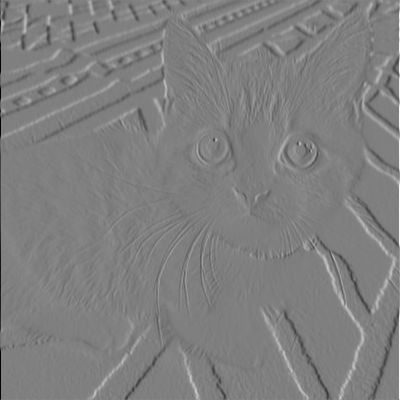

In [79]:

cat_filtered = A[0,0].detach().numpy()
# Scale the values to the 0-255 range
cat_filtered_normalized = 255 * (cat_filtered - np.min(cat_filtered)) / (np.max(cat_filtered) - np.min(cat_filtered))

# Convert to uint8 (8-bit unsigned integer)
cat_filtered_normalized = cat_filtered_normalized.astype(np.uint8)

# Create and show the image
Image.fromarray(cat_filtered_normalized)


# the original filtered image

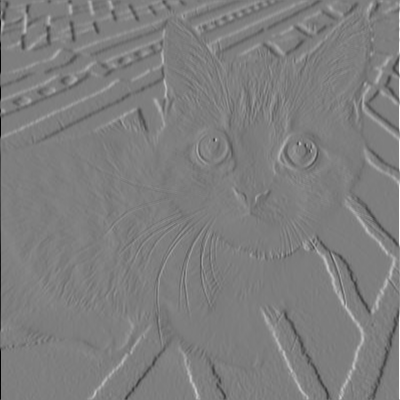

In [80]:
cat_filtered = y[0,0].detach().numpy()
cat_filtered_normalized = 255 * (cat_filtered - np.min(cat_filtered)) / (np.max(cat_filtered) - np.min(cat_filtered))

# Convert to uint8 (8-bit unsigned integer)
cat_filtered_normalized = cat_filtered_normalized.astype(np.uint8)

# Create and show the image
Image.fromarray(cat_filtered_normalized)

In [86]:
w_filter

tensor([[[[ 0.9873, -0.1869, -0.8745],
          [ 1.2675, -0.1692, -0.9374],
          [ 0.7767,  0.2820, -1.1460]]]], requires_grad=True)

In [87]:
ground_truth_filter

tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]])

In [85]:
w_filter-ground_truth_filter

tensor([[[[-0.0127, -0.1869,  0.1255],
          [ 0.2675, -0.1692,  0.0626],
          [-0.2233,  0.2820, -0.1460]]]], grad_fn=<SubBackward0>)